# Libraries

In [ ]:
# import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import nltk
import re

# For Splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

# Text tokenization
from keras.preprocessing.text import text_to_word_sequence, Tokenizer

# Vectorization technique TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorization technique CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Tuning Machine Learning Model Parameters Technique
from sklearn.model_selection import GridSearchCV

# Accuracy measuring library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# Libraries for LSTM
import gensim
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.models import Sequential
from tensorflow import keras

# Text Summarisation Evaluation Metric
!pip install rouge
from rouge import Rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Download the essential files from the NLTK library
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Loading the data from true and fake news documents
true_news = pd.read_csv("/content/True.csv")
fake_news = pd.read_csv("/content/Fake.csv")

# Data Visualisation 

In [ ]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
# Displaying rows and columns in dataset
print("There are {} number of rows and {} number of columns for true news.".format(true_news.shape[0],true_news.shape[1]))
print("There are {} number of rows and {} number of columns for fake news.".format(fake_news.shape[0],fake_news.shape[1]))

There are 21417 number of rows and 4 number of columns for true news.
There are 23481 number of rows and 4 number of columns for fake news.


(-0.5, 999.5, 499.5, -0.5)

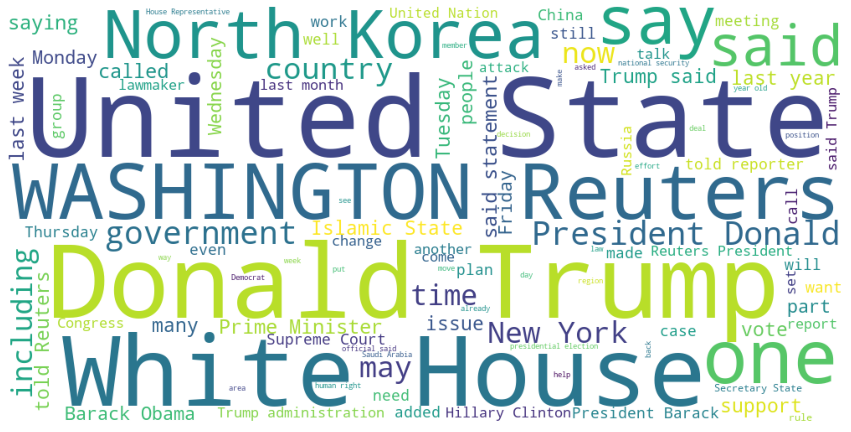

In [ ]:
# Plot the true dataset's wordcloud using top 100 words

plt.figure(figsize = (15,15))
true_world_cloud = WordCloud(max_words = 100 , width = 1000 , height = 500, background_color="rgba(255, 255, 255, 0)", 
                             stopwords = STOPWORDS).generate(" ".join(true_news.text))
plt.imshow(true_world_cloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

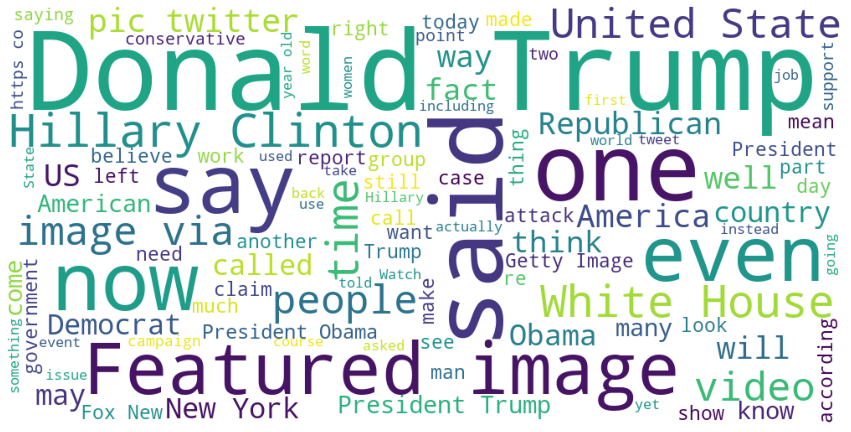

In [ ]:
# Plot the true dataset's wordcloud using top 100 words

plt.figure(figsize = (15,15))
fake_world_cloud = WordCloud(max_words = 100 , width = 1000 , height = 500, background_color="rgba(255, 255, 255, 0)", 
                             stopwords = STOPWORDS).generate(" ".join(fake_news.text))
plt.imshow(fake_world_cloud)
plt.axis('off')

#Pre-processing

In [ ]:
# We only need two essential columns - title and text and drop the rest rows
fake_news = fake_news[["title", "text"]]
true_news = true_news[["title", "text"]]

# Adding a new class column for both true and fake news dataframes
# Set 0 for true news
true_news["class"] = 0

# Set 1 for fake news
fake_news["class"] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
true_news.head()

,title,text,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [ ]:
fake_news.head()

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


In [ ]:
# Combine the title with the article text
true_news['text'] = true_news['title'] +" "+ true_news['text']
fake_news['text'] = fake_news['title'] +" "+ fake_news['text']

In [ ]:
# merge the two dataframes
data = pd.concat([true_news, fake_news], axis=0, ignore_index = True)

# randomly shuffling data
data = shuffle(data)

# Experiment 1 and 4
data = data.reset_index(drop= True)

# Copy a dataframe for lstm model
lstm_df = data.copy()

#Data Engineering

In [ ]:
# Defining the function for remove punctuation
def remove_punctuation(content):
  # All the sequences except english characters are removed from the string
  review = re.sub('[^a-zA-Z]',' ',content)
  return review

In [ ]:
# Defining the function for lowercase
def lowercase(content):
  # All the strings are converted to lower case
  result = content.lower()
  return result

In [ ]:
# Defining the function for tokenization
def tokenization(content):
  result = text_to_word_sequence(content)
  return result

In [ ]:
porter_stemmer = PorterStemmer()

# Defining the function for Porter Stemming
def porter_stemming(content):
  # Apply Porter Stemmer function and remove Stopwords
  result = [porter_stemmer.stem(word) for word in content  if not word in stopwords.words('english')]
  result = ' '.join(result)
  return result

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

# Defining the function for Lemmatization
def lemmatizer(text):
  # Apply Word Net Lemmatizer function and remove Stopwords
  result = [wordnet_lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
  result = ' '.join(result)
  return result

In [ ]:
# Applying remove_punctuation function
data['text'] = data['text'].apply(remove_punctuation)

In [ ]:
# Applying lowercase function
data['text'] = data['text'].apply(lowercase)

In [ ]:
# Applying tokenization function
data['text'] = data['text'].apply(tokenization)

In [ ]:
# Experiment 2 lemmatisation and countvectorise
# We only need remove_punctuation, lowercase, and tokenisation function here
experiment_2 = data.copy()

In [ ]:
# Applying porter_stemming function
data['text'] = data['text'].apply(porter_stemming)

In [ ]:
# Experiment 3 potter stemmer and TF-IDF
# We copy and reuse the data from the first dataframe that has been done potter stemmer
experiment_3 = data.copy()

In [ ]:
# Separating the data and label for experiment 1 and 4
X = data['text'].values
Y = data['class'].values

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
#Creating the bag of words model using CountVectorizer
CV_vectorization = CountVectorizer(max_features = 5000,ngram_range=(1,3), lowercase=False)
xv_train = CV_vectorization.fit_transform(X_train)
xv_test = CV_vectorization.transform(X_test)

# Model Building: Fake News Classifier

## Porter Stemmer and CountVectorizer experiment 1

### SVM

In [ ]:
#1. Support Vector Machine(SVM)
svm_model = SVC()

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

In [ ]:
# Calculate the accuracy score of SVM classifier
svm_accuracy_score = accuracy_score(y_test,svm_y_pred)
print('Accuracy of SVM model is ', svm_accuracy_score)

# Calculate the Precision score of SVM classifier
svm_precision_score = precision_score(y_test,svm_y_pred, average='macro')
print('\nPrecision of SVM model is ', svm_precision_score)

# Calculate the Recall score of SVM classifier
svm_recall_score = recall_score(y_test,svm_y_pred, average='macro')
print('\nRecall of SVM model is ', svm_recall_score)

# Calculate the F1 score of SVM classifier
svm_f1_score = f1_score(y_test,svm_y_pred, average='macro')
print('\nF1 score of SVM model is ', svm_f1_score)

# Support Vector Machine(SVM) - Classification Report
print("\n\nSupport Vector Machine(SVM) - Classification Report\n\n")
print(classification_report(y_test,svm_y_pred, target_names = ['True','Fake']))

Accuracy of SVM model is  0.9933859755686036

Precision of SVM model is  0.9934028397019414

Recall of SVM model is  0.9933458346626794

F1 score of SVM model is  0.9933738822356928


Support Vector Machine(SVM) - Classification Report


              precision    recall  f1-score   support

        True       0.99      0.99      0.99      7097
        Fake       0.99      0.99      0.99      7720

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



Text(0.5, 69.0, 'Predicted label')

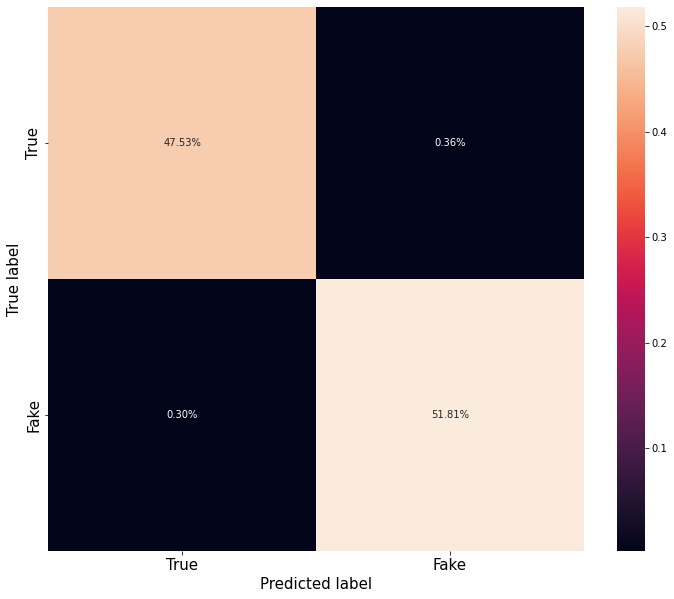

In [ ]:
# Ploting the Support Vector Machine(SVM) confusion matrix using the seaborn library

graph = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph / np.sum(graph),fmt='.2%', annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, svm_y_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, svm_y_pred)
auc_score1 = '{0:.3g}'.format(auc_score1)

print("The AUC score for Support Vector Machine model is: ", auc_score1)

The AUC score for Support Vector Machine model is:  0.993


### Logistic Regression Classifier

In [ ]:
#2. Logistic Regression
lr_model = LogisticRegression()

#Fitting training set to the model
lr_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
lr_y_pred = lr_model.predict(xv_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Calculate the accuracy score of Logistic Regression model
lr_accuracy_score = accuracy_score(y_test,lr_y_pred)
print('Accuracy of Logistic Regression Classifier model is ', lr_accuracy_score)

# Calculate the Precision score of Logistic Regression model
lr_precision_score = precision_score(y_test,lr_y_pred, average='macro')
print('\nPrecision of Logistic Regression model is ', lr_precision_score)

# Calculate the Recall score of Logistic Regression model
lr_recall_score = recall_score(y_test,lr_y_pred, average='macro')
print('\nRecall of Logistic Regression model is ', lr_recall_score)

# Calculate the F1 score of Logistic Regression model
lr_f1_score = f1_score(y_test,lr_y_pred, average='macro')
print('\nF1 score of Logistic Regression model is ', lr_f1_score)

# Logistic Regression Model - Classification Report
print("\n\nLogistic Regression model - Classification Report\n")
print(classification_report(y_test,lr_y_pred, target_names = ['True','Fake']))

Accuracy of Logistic Regression Classifier model is  0.9961530674225552

Precision of Logistic Regression model is  0.9960914834383494

Recall of Logistic Regression model is  0.9962059517960227

F1 score of Logistic Regression model is  0.9961467067288219


Logistic Regression model - Classification Report

              precision    recall  f1-score   support

        True       0.99      1.00      1.00      7097
        Fake       1.00      0.99      1.00      7720

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817



Text(0.5, 69.0, 'Predicted label')

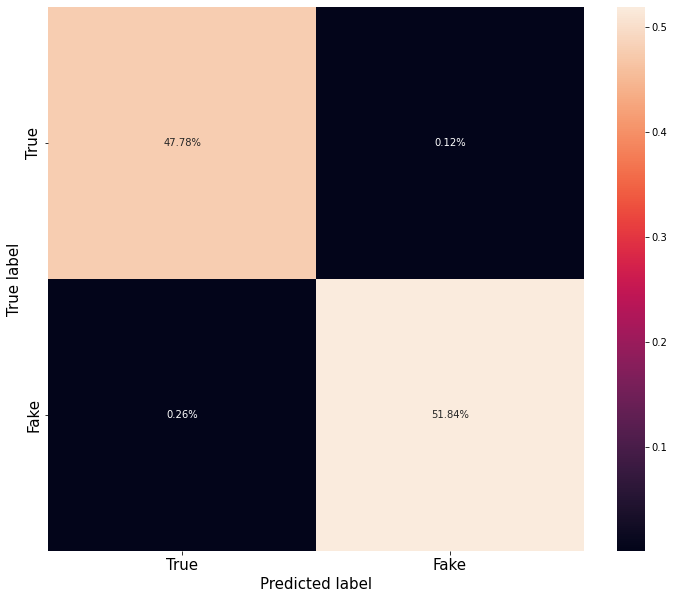

In [ ]:
# Ploting the confusion matrix using the seaborn library

graph = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph/ np.sum(graph),fmt='.2%', annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test, lr_y_pred)

In [ ]:
# auc scores
auc_score2 = roc_auc_score(y_test, lr_y_pred)
auc_score2 = '{0:.3g}'.format(auc_score2)

print("The AUC score for Logistic Regression model is: ", auc_score2)

The AUC score for Logistic Regression model is:  0.996


### Naive Bayes

In [ ]:
#3. Naive Bayes Approach 
NB_model = GaussianNB()

#Fitting training set to the model
NB_model.fit(xv_train.toarray(), y_train)

#Predicting the test set results based on the model
nb_y_pred = NB_model.predict(xv_test.toarray())

In [ ]:
# Calculate the accuracy score of Gaussian Naive Bayes model
NB_accuracy_score = accuracy_score(y_test,nb_y_pred)
print('Accuracy of Naive Bayes model is ', NB_accuracy_score)

# Calculate the Precision score of Gaussian Naive Bayes classifier
NB_precision_score = precision_score(y_test,nb_y_pred, average='macro')
print('\nPrecision of Gaussian Naive Bayes model is ', NB_precision_score)

# Calculate the Recall score of Gaussian Naive Bayes classifier
NB_recall_score = recall_score(y_test,nb_y_pred, average='macro')
print('\nRecall of Gaussian Naive Bayes model is ', NB_recall_score)

# Calculate the F1 score of Gaussian Naive Bayes classifier
NB_f1_score = f1_score(y_test,nb_y_pred, average='macro')
print('\nF1 score of Gaussian Naive Bayes model is ', NB_f1_score)

# Gaussian Naive Bayes Classifier - Classification Report
print("\n\nGaussian Naive Bayes - Classification Report\n")
print(classification_report(y_test,nb_y_pred, target_names = ['True','Fake']))

Accuracy of Naive Bayes model is  0.9328474050077613

Precision of Gaussian Naive Bayes model is  0.9345307603363554

Recall of Gaussian Naive Bayes model is  0.9345108693668273

F1 score of Gaussian Naive Bayes model is  0.9328474001137806


Gaussian Naive Bayes - Classification Report

              precision    recall  f1-score   support

        True       0.90      0.97      0.93      7097
        Fake       0.97      0.89      0.93      7720

    accuracy                           0.93     14817
   macro avg       0.93      0.93      0.93     14817
weighted avg       0.94      0.93      0.93     14817



Text(0.5, 69.0, 'Predicted label')

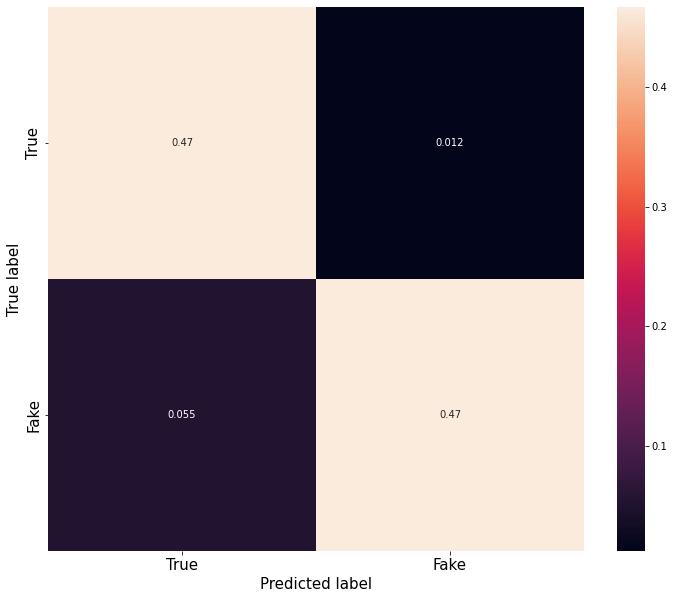

In [ ]:
# Ploting the confusion matrix using the seaborn library

graph = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph / np.sum(graph), annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr3, tpr3, thresh3 = roc_curve(y_test, nb_y_pred)

In [ ]:
# auc scores
auc_score3 = roc_auc_score(y_test, nb_y_pred)
auc_score3 = '{0:.3g}'.format(auc_score3)

print("The AUC score for Gaussian Naive Bayes model is: ", auc_score3)

The AUC score for Gaussian Naive Bayes model is:  0.935


### Results

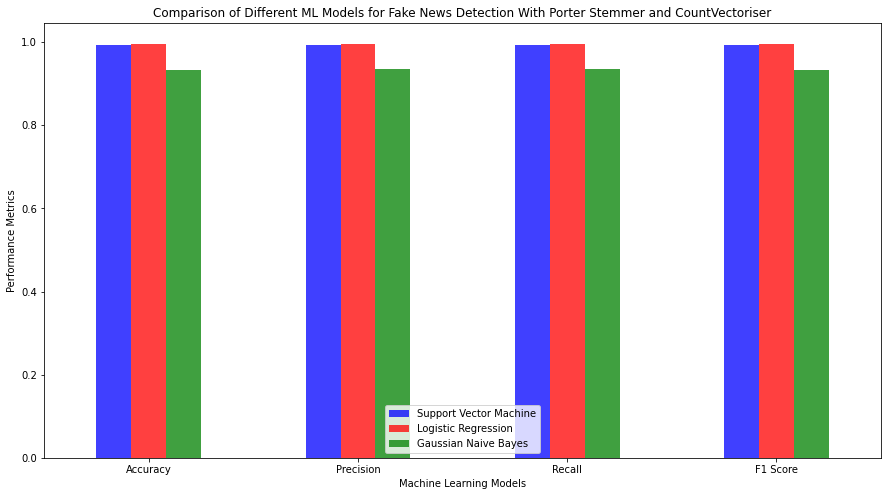

In [ ]:
plotdata = pd.DataFrame({
    "Support Vector Machine":[svm_accuracy_score,svm_precision_score,svm_recall_score,svm_f1_score],

    "Logistic Regression":[lr_accuracy_score,lr_precision_score,lr_recall_score,lr_f1_score],

    "Gaussian Naive Bayes":[NB_accuracy_score,NB_precision_score,NB_recall_score,NB_f1_score]},

    index=["Accuracy", "Precision", "Recall", "F1 Score"])

plotdata.plot(kind="bar",figsize=(15, 8),alpha=0.75, rot=0, color=['blue', 'red', 'green'])

plt.title("Comparison of Different ML Models for Fake News Detection With Porter Stemmer and CountVectoriser")

plt.xlabel("Machine Learning Models")

plt.ylabel("Performance Metrics")

plt.savefig('Comparison',dpi=300)

In [ ]:
display(plotdata)

,Support Vector Machine,Logistic Regression,Gaussian Naive Bayes
Accuracy,0.993386,0.996153,0.932847
Precision,0.993403,0.996091,0.934531
Recall,0.993346,0.996206,0.934511
F1 Score,0.993374,0.996147,0.932847


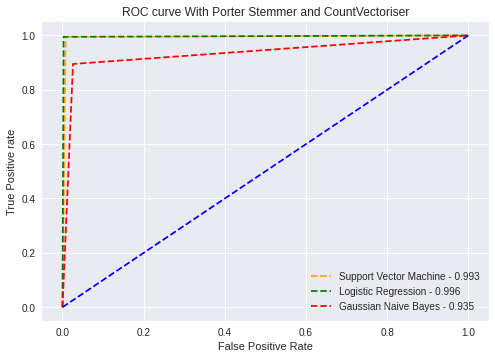

In [ ]:
label1 = 'Support Vector Machine - ' + auc_score1
label2 = 'Logistic Regression - ' + auc_score2
label3 = 'Gaussian Naive Bayes - ' + auc_score3

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=label1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label=label2)
plt.plot(fpr3, tpr3, linestyle='--',color='red', label=label3)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve With Porter Stemmer and CountVectoriser')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Lemmatisation and TF-IDF experiment 2

In [ ]:
# Applying lemmatizer function for experiment 2
experiment_2['text'] = experiment_2['text'].apply(lemmatizer)

# Separating the data and label
X2 = experiment_2['text'].values
Y2 = experiment_2['class'].values

# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=42)

# Apply for Vectorization using TF-IDF features for the experiment 2
TF_vectorization = TfidfVectorizer(max_features = 5000,ngram_range=(1,3), lowercase=False)
xv_train2 = TF_vectorization.fit_transform(X_train2)
xv_test2 = TF_vectorization.transform(X_test2)

### SVM

In [ ]:
#1. Support Vector Machine(SVM)
svm_model_2 = SVC()

#Fitting training set to the model
svm_model_2.fit(xv_train2,y_train2)

#Predicting the test set results based on the model
svm_y_pred = svm_model_2.predict(xv_test2)

In [ ]:
# Calculate the accuracy score of SVM classifier
svm_accuracy_score = accuracy_score(y_test2,svm_y_pred)
print('Accuracy of SVM model is ', svm_accuracy_score)

# Calculate the Precision score of SVM classifier
svm_precision_score = precision_score(y_test2,svm_y_pred, average='macro')
print('\nPrecision of SVM model is ', svm_precision_score)

# Calculate the Recall score of SVM classifier
svm_recall_score = recall_score(y_test2,svm_y_pred, average='macro')
print('\nRecall of SVM model is ', svm_recall_score)

# Calculate the F1 score of SVM classifier
svm_f1_score = f1_score(y_test2,svm_y_pred, average='macro')
print('\nF1 score of SVM model is ', svm_f1_score)

# Support Vector Machine(SVM) - Classification Report
print("\n\nSupport Vector Machine(SVM) - Classification Report\n\n")
print(classification_report(y_test2,svm_y_pred, target_names = ['True','Fake']))

Accuracy of SVM model is  0.994263346156442

Precision of SVM model is  0.9942847666012353

Recall of SVM model is  0.9942222481068745

F1 score of SVM model is  0.9942529564080963


Support Vector Machine(SVM) - Classification Report


              precision    recall  f1-score   support

        True       0.99      0.99      0.99      7099
        Fake       0.99      1.00      0.99      7718

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



Text(0.5, 69.0, 'Predicted label')

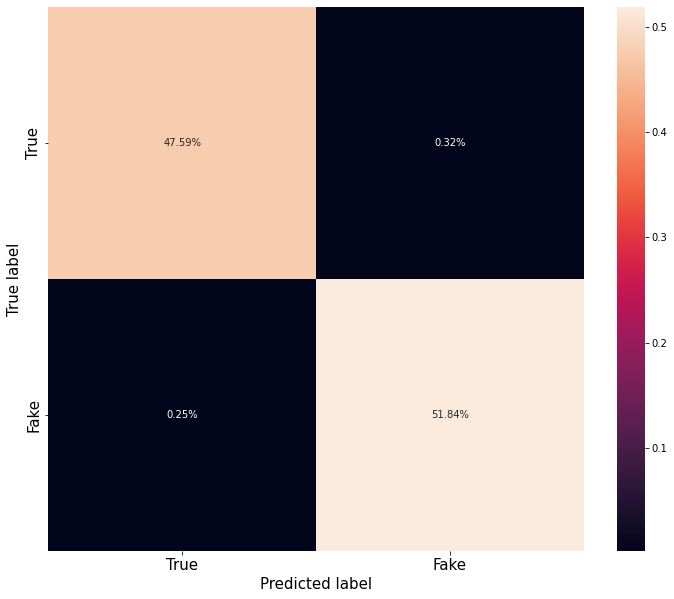

In [ ]:
# Ploting the Support Vector Machine(SVM) confusion matrix using the seaborn library

graph = confusion_matrix(y_test2, svm_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph / np.sum(graph),fmt='.2%', annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test2, svm_y_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test2))]
p_fpr, p_tpr, _ = roc_curve(y_test2, random_probs, pos_label=1)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test2, svm_y_pred)
auc_score1 = '{0:.3g}'.format(auc_score1)

print("The AUC score for Support Vector Machine model is: ", auc_score1)

The AUC score for Support Vector Machine model is:  0.994


### Logistic Regression Classifier

In [ ]:
#2. Logistic Regression
lr_model_2 = LogisticRegression()

#Fitting training set to the model
lr_model_2.fit(xv_train2,y_train2)

#Predicting the test set results based on the model
lr_y_pred = lr_model_2.predict(xv_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Calculate the accuracy score of Logistic Regression model
lr_accuracy_score = accuracy_score(y_test2,lr_y_pred)
print('Accuracy of Logistic Regression Classifier model is ', lr_accuracy_score)

# Calculate the Precision score of Logistic Regression model
lr_precision_score = precision_score(y_test2,lr_y_pred, average='macro')
print('\nPrecision of Logistic Regression model is ', lr_precision_score)

# Calculate the Recall score of Logistic Regression model
lr_recall_score = recall_score(y_test2,lr_y_pred, average='macro')
print('\nRecall of Logistic Regression model is ', lr_recall_score)

# Calculate the F1 score of Logistic Regression model
lr_f1_score = f1_score(y_test2,lr_y_pred, average='macro')
print('\nF1 score of Logistic Regression model is ', lr_f1_score)

# Logistic Regression Model - Classification Report
print("\n\nLogistic Regression model - Classification Report\n")
print(classification_report(y_test2,lr_y_pred, target_names = ['True','Fake']))

Accuracy of Logistic Regression Classifier model is  0.9968954579199568

Precision of Logistic Regression model is  0.9969013329478446

Recall of Logistic Regression model is  0.9968787325414115

F1 score of Logistic Regression model is  0.9968899597071228


Logistic Regression model - Classification Report

              precision    recall  f1-score   support

        True       1.00      1.00      1.00      7099
        Fake       1.00      1.00      1.00      7718

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817



Text(0.5, 69.0, 'Predicted label')

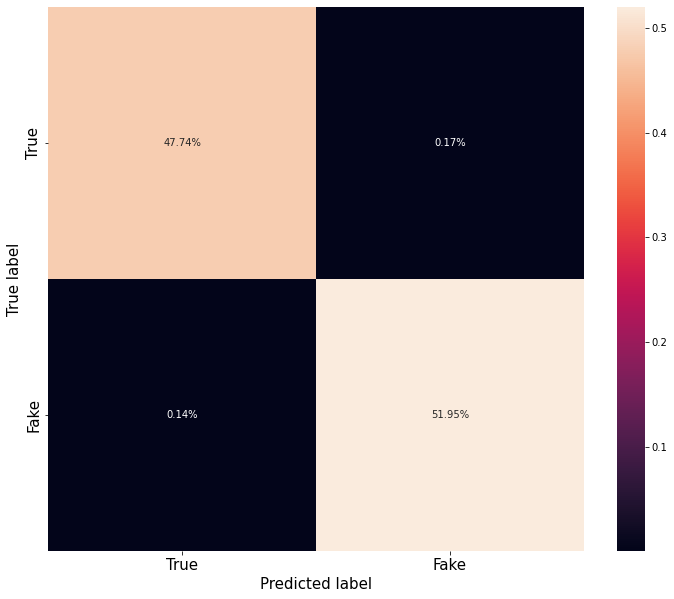

In [ ]:
# Ploting the confusion matrix using the seaborn library

graph = confusion_matrix(y_test2, lr_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph/ np.sum(graph),fmt='.2%', annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test2, lr_y_pred)

In [ ]:
# auc scores
auc_score2 = roc_auc_score(y_test2, lr_y_pred)
auc_score2 = '{0:.3g}'.format(auc_score2)

print("The AUC score for Logistic Regression model is: ", auc_score2)

The AUC score for Logistic Regression model is:  0.997


### Naive Bayes

In [ ]:
#3. Naive Bayes Approach 
NB_model_2 = GaussianNB()

#Fitting training set to the model
NB_model_2.fit(xv_train2.toarray(), y_train2)

#Predicting the test set results based on the model
nb_y_pred = NB_model_2.predict(xv_test2.toarray())

In [ ]:
# Calculate the accuracy score of Gaussian Naive Bayes model
NB_accuracy_score = accuracy_score(y_test2,nb_y_pred)
print('Accuracy of Naive Bayes model is ', NB_accuracy_score)

# Calculate the Precision score of Gaussian Naive Bayes classifier
NB_precision_score = precision_score(y_test2,nb_y_pred, average='macro')
print('\nPrecision of Gaussian Naive Bayes model is ', NB_precision_score)

# Calculate the Recall score of Gaussian Naive Bayes classifier
NB_recall_score = recall_score(y_test2,nb_y_pred, average='macro')
print('\nRecall of Gaussian Naive Bayes model is ', NB_recall_score)

# Calculate the F1 score of Gaussian Naive Bayes classifier
NB_f1_score = f1_score(y_test2,nb_y_pred, average='macro')
print('\nF1 score of Gaussian Naive Bayes model is ', NB_f1_score)

# Gaussian Naive Bayes Classifier - Classification Report
print("\n\nGaussian Naive Bayes - Classification Report\n")
print(classification_report(y_test2,nb_y_pred, target_names = ['True','Fake']))

Accuracy of Naive Bayes model is  0.9347371262738746

Precision of Gaussian Naive Bayes model is  0.9366112250124209

Recall of Gaussian Naive Bayes model is  0.9364560724694663

F1 score of Gaussian Naive Bayes model is  0.9347368587331363


Gaussian Naive Bayes - Classification Report

              precision    recall  f1-score   support

        True       0.90      0.98      0.93      7099
        Fake       0.98      0.90      0.93      7718

    accuracy                           0.93     14817
   macro avg       0.94      0.94      0.93     14817
weighted avg       0.94      0.93      0.93     14817



Text(0.5, 69.0, 'Predicted label')

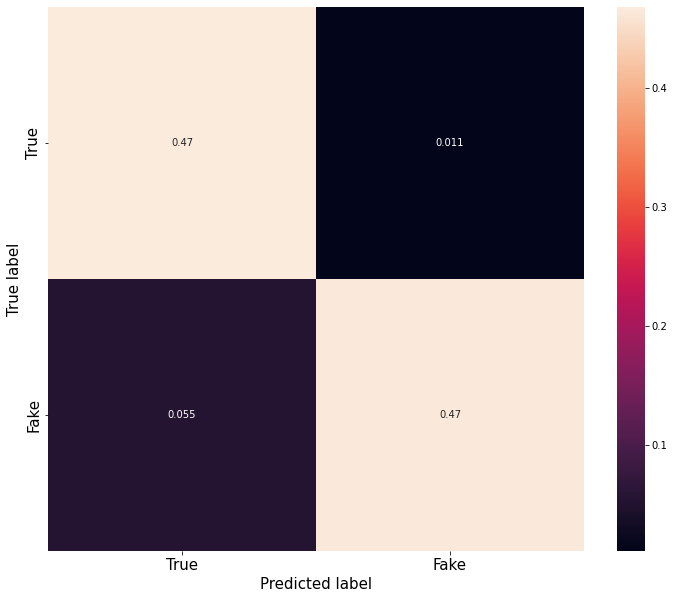

In [ ]:
# Ploting the confusion matrix using the seaborn library

graph = confusion_matrix(y_test2, nb_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph / np.sum(graph), annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr3, tpr3, thresh3 = roc_curve(y_test2, nb_y_pred)

In [ ]:
# auc scores
auc_score3 = roc_auc_score(y_test2, nb_y_pred)
auc_score3 = '{0:.3g}'.format(auc_score3)

print("The AUC score for Gaussian Naive Bayes model is: ", auc_score3)

The AUC score for Gaussian Naive Bayes model is:  0.936


### Results for experiment 2

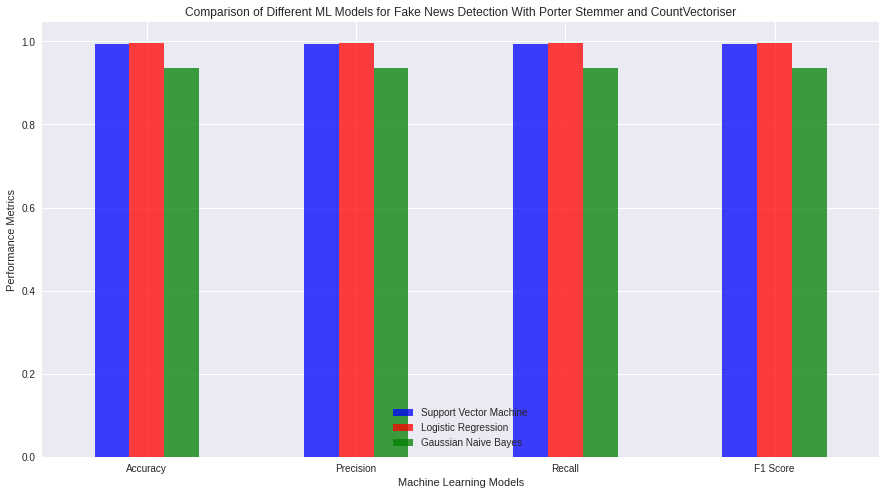

In [ ]:
plotdata = pd.DataFrame({
    "Support Vector Machine":[svm_accuracy_score,svm_precision_score,svm_recall_score,svm_f1_score],

    "Logistic Regression":[lr_accuracy_score,lr_precision_score,lr_recall_score,lr_f1_score],

    "Gaussian Naive Bayes":[NB_accuracy_score,NB_precision_score,NB_recall_score,NB_f1_score]},

    index=["Accuracy", "Precision", "Recall", "F1 Score"])

plotdata.plot(kind="bar",figsize=(15, 8),alpha=0.75, rot=0, color=['blue', 'red', 'green'])

plt.title("Comparison of Different ML Models for Fake News Detection With Porter Stemmer and CountVectoriser")

plt.xlabel("Machine Learning Models")

plt.ylabel("Performance Metrics")

plt.savefig('Comparison',dpi=300)

In [ ]:
display(plotdata)

,Support Vector Machine,Logistic Regression,Gaussian Naive Bayes
Accuracy,0.994263,0.996895,0.934737
Precision,0.994285,0.996901,0.936611
Recall,0.994222,0.996879,0.936456
F1 Score,0.994253,0.996890,0.934737


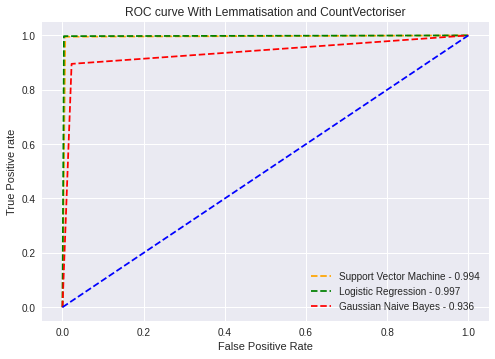

In [ ]:
label1 = 'Support Vector Machine - ' + auc_score1
label2 = 'Logistic Regression - ' + auc_score2
label3 = 'Gaussian Naive Bayes - ' + auc_score3

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=label1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label=label2)
plt.plot(fpr3, tpr3, linestyle='--',color='red', label=label3)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve With Lemmatisation and CountVectoriser')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Potter Stemmer and TF-IDF Features experiment 3

In [ ]:
# Separating the data and label
X3 = experiment_3['text'].values
Y3 = experiment_3['class'].values

# Split the data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=0.33, random_state=42)

# Apply for Vectorization using TF-IDF features for the experiment 3
TF_vectorization = TfidfVectorizer(max_features = 5000,ngram_range=(1,3), lowercase=False)
xv_train3 = TF_vectorization.fit_transform(X_train3)
xv_test3 = TF_vectorization.transform(X_test3)

### SVM

In [ ]:
#1. Support Vector Machine(SVM)
svm_model_3 = SVC()

#Fitting training set to the model
svm_model_3.fit(xv_train3,y_train3)

#Predicting the test set results based on the model
svm_y_pred = svm_model_3.predict(xv_test3)

In [ ]:
# Calculate the accuracy score of SVM classifier
svm_accuracy_score = accuracy_score(y_test3,svm_y_pred)
print('Accuracy of SVM model is ', svm_accuracy_score)

# Calculate the Precision score of SVM classifier
svm_precision_score = precision_score(y_test3,svm_y_pred, average='macro')
print('\nPrecision of SVM model is ', svm_precision_score)

# Calculate the Recall score of SVM classifier
svm_recall_score = recall_score(y_test3,svm_y_pred, average='macro')
print('\nRecall of SVM model is ', svm_recall_score)

# Calculate the F1 score of SVM classifier
svm_f1_score = f1_score(y_test3,svm_y_pred, average='macro')
print('\nF1 score of SVM model is ', svm_f1_score)

# Support Vector Machine(SVM) - Classification Report
print("\n\nSupport Vector Machine(SVM) - Classification Report\n\n")
print(classification_report(y_test3,svm_y_pred, target_names = ['True','Fake']))

Accuracy of SVM model is  0.994263346156442

Precision of SVM model is  0.9942186099655144

Recall of SVM model is  0.9942901419340142

F1 score of SVM model is  0.9942536067059373


Support Vector Machine(SVM) - Classification Report


              precision    recall  f1-score   support

        True       0.99      0.99      0.99      7097
        Fake       1.00      0.99      0.99      7720

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



Text(0.5, 69.0, 'Predicted label')

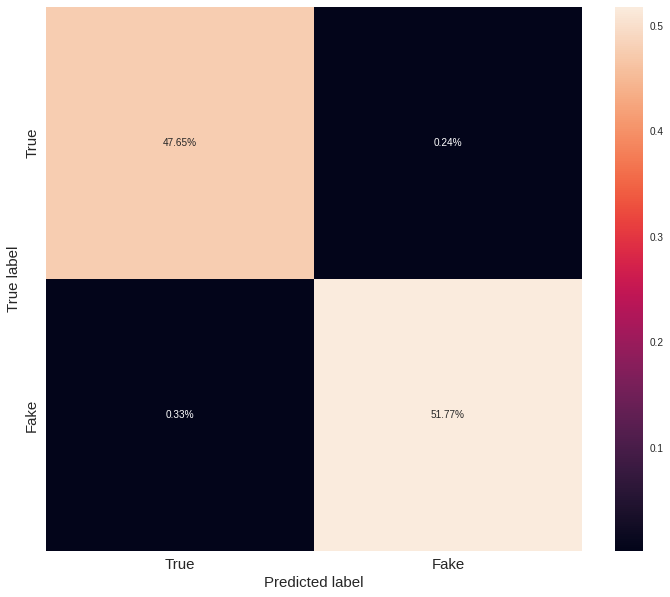

In [ ]:
# Ploting the Support Vector Machine(SVM) confusion matrix using the seaborn library

graph = confusion_matrix(y_test3, svm_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph / np.sum(graph),fmt='.2%', annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test3, svm_y_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test3))]
p_fpr, p_tpr, _ = roc_curve(y_test3, random_probs, pos_label=1)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test3, svm_y_pred)
auc_score1 = '{0:.3g}'.format(auc_score1)

print("The AUC score for Support Vector Machine model is: ", auc_score1)

The AUC score for Support Vector Machine model is:  0.994


### Logistic Regression Classifier

In [ ]:
#2. Logistic Regression
lr_model_3 = LogisticRegression()

#Fitting training set to the model
lr_model_3.fit(xv_train3,y_train3)

#Predicting the test set results based on the model
lr_y_pred = lr_model_3.predict(xv_test3)

In [ ]:
# Calculate the accuracy score of Logistic Regression model
lr_accuracy_score = accuracy_score(y_test3,lr_y_pred)
print('Accuracy of Logistic Regression Classifier model is ', lr_accuracy_score)

# Calculate the Precision score of Logistic Regression model
lr_precision_score = precision_score(y_test3,lr_y_pred, average='macro')
print('\nPrecision of Logistic Regression model is ', lr_precision_score)

# Calculate the Recall score of Logistic Regression model
lr_recall_score = recall_score(y_test3,lr_y_pred, average='macro')
print('\nRecall of Logistic Regression model is ', lr_recall_score)

# Calculate the F1 score of Logistic Regression model
lr_f1_score = f1_score(y_test3,lr_y_pred, average='macro')
print('\nF1 score of Logistic Regression model is ', lr_f1_score)

# Logistic Regression Model - Classification Report
print("\n\nLogistic Regression model - Classification Report\n")
print(classification_report(y_test3,lr_y_pred, target_names = ['True','Fake']))

Accuracy of Logistic Regression Classifier model is  0.9883242221772288

Precision of Logistic Regression model is  0.9882196527531216

Recall of Logistic Regression model is  0.9884030397431303

F1 score of Logistic Regression model is  0.9883058057919347


Logistic Regression model - Classification Report

              precision    recall  f1-score   support

        True       0.99      0.99      0.99      7097
        Fake       0.99      0.99      0.99      7720

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



Text(0.5, 69.0, 'Predicted label')

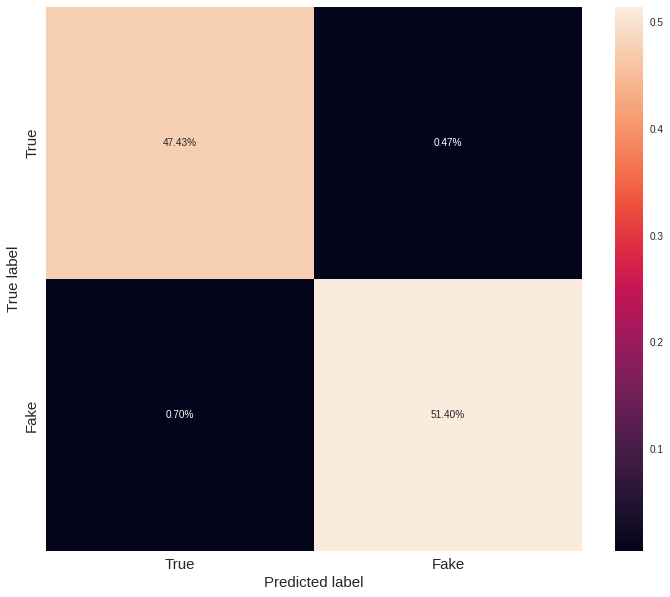

In [ ]:
# Ploting the confusion matrix using the seaborn library

graph = confusion_matrix(y_test3, lr_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph/ np.sum(graph),fmt='.2%', annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test3, lr_y_pred)

In [ ]:
# auc scores
auc_score2 = roc_auc_score(y_test3, lr_y_pred)
auc_score2 = '{0:.3g}'.format(auc_score2)

print("The AUC score for Logistic Regression model is: ", auc_score2)

The AUC score for Logistic Regression model is:  0.988


### Naive Bayes

In [ ]:
#3. Naive Bayes Approach 
NB_model_3 = GaussianNB()

#Fitting training set to the model
NB_model_3.fit(xv_train3.toarray(), y_train3)

#Predicting the test set results based on the model
nb_y_pred = NB_model_3.predict(xv_test3.toarray())

In [ ]:
# Calculate the accuracy score of Gaussian Naive Bayes model
NB_accuracy_score = accuracy_score(y_test3,nb_y_pred)
print('Accuracy of Naive Bayes model is ', NB_accuracy_score)

# Calculate the Precision score of Gaussian Naive Bayes classifier
NB_precision_score = precision_score(y_test3,nb_y_pred, average='macro')
print('\nPrecision of Gaussian Naive Bayes model is ', NB_precision_score)

# Calculate the Recall score of Gaussian Naive Bayes classifier
NB_recall_score = recall_score(y_test3,nb_y_pred, average='macro')
print('\nRecall of Gaussian Naive Bayes model is ', NB_recall_score)

# Calculate the F1 score of Gaussian Naive Bayes classifier
NB_f1_score = f1_score(y_test3,nb_y_pred, average='macro')
print('\nF1 score of Gaussian Naive Bayes model is ', NB_f1_score)

# Gaussian Naive Bayes Classifier - Classification Report
print("\n\nGaussian Naive Bayes - Classification Report\n")
print(classification_report(y_test3,nb_y_pred, target_names = ['True','Fake']))

Accuracy of Naive Bayes model is  0.9628129850847

Precision of Gaussian Naive Bayes model is  0.962586393981536

Recall of Gaussian Naive Bayes model is  0.9630456129386933

F1 score of Gaussian Naive Bayes model is  0.9627674798466119


Gaussian Naive Bayes - Classification Report

              precision    recall  f1-score   support

        True       0.95      0.97      0.96      7097
        Fake       0.97      0.96      0.96      7720

    accuracy                           0.96     14817
   macro avg       0.96      0.96      0.96     14817
weighted avg       0.96      0.96      0.96     14817



Text(0.5, 69.0, 'Predicted label')

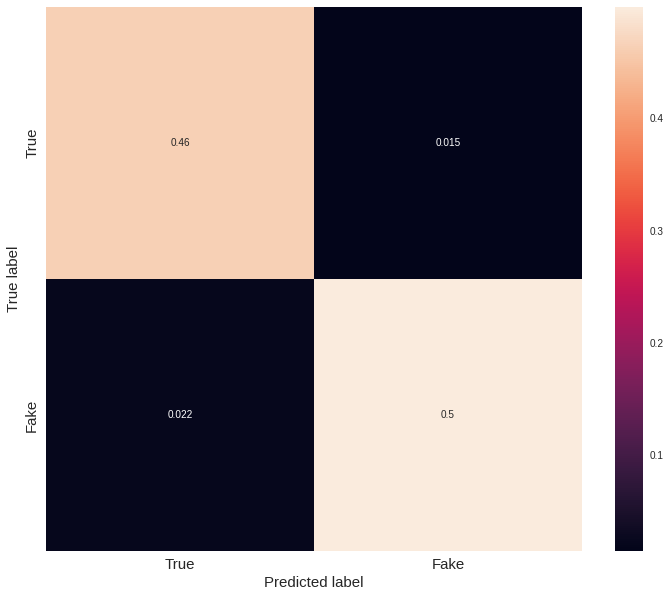

In [ ]:
# Ploting the confusion matrix using the seaborn library

graph = confusion_matrix(y_test3, nb_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph / np.sum(graph), annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr3, tpr3, thresh3 = roc_curve(y_test3, nb_y_pred)

In [ ]:
# auc scores
auc_score3 = roc_auc_score(y_test3, nb_y_pred)
auc_score3 = '{0:.3g}'.format(auc_score3)

print("The AUC score for Gaussian Naive Bayes model is: ", auc_score3)

The AUC score for Gaussian Naive Bayes model is:  0.963


### Results for experiment 3

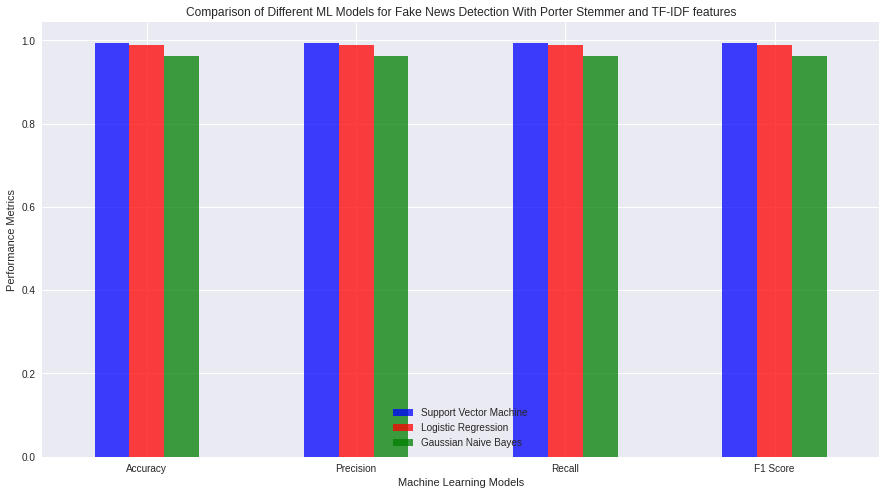

In [ ]:
plotdata = pd.DataFrame({
    "Support Vector Machine":[svm_accuracy_score,svm_precision_score,svm_recall_score,svm_f1_score],

    "Logistic Regression":[lr_accuracy_score,lr_precision_score,lr_recall_score,lr_f1_score],

    "Gaussian Naive Bayes":[NB_accuracy_score,NB_precision_score,NB_recall_score,NB_f1_score]},

    index=["Accuracy", "Precision", "Recall", "F1 Score"])

plotdata.plot(kind="bar",figsize=(15, 8),alpha=0.75, rot=0, color=['blue', 'red', 'green'])

plt.title("Comparison of Different ML Models for Fake News Detection With Porter Stemmer and TF-IDF features")

plt.xlabel("Machine Learning Models")

plt.ylabel("Performance Metrics")

plt.savefig('Comparison',dpi=300)

In [ ]:
display(plotdata)

,Support Vector Machine,Logistic Regression,Gaussian Naive Bayes
Accuracy,0.994263,0.988324,0.962813
Precision,0.994219,0.988220,0.962586
Recall,0.994290,0.988403,0.963046
F1 Score,0.994254,0.988306,0.962767


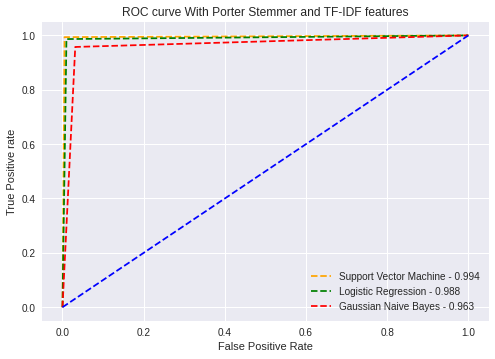

In [ ]:
label1 = 'Support Vector Machine - ' + auc_score1
label2 = 'Logistic Regression - ' + auc_score2
label3 = 'Gaussian Naive Bayes - ' + auc_score3

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=label1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label=label2)
plt.plot(fpr3, tpr3, linestyle='--',color='red', label=label3)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve With Porter Stemmer and TF-IDF features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Hyperparameter tuning for Machine learning models experiment 4

### Tuning Support Vector Machine

In [ ]:
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
 
svm_tuning = GridSearchCV(SVC(), param_grid, refit = True, cv = 5, scoring = 'accuracy', n_jobs = 4)
 
# Fitting the model for grid search
svm_tuning.fit(xv_train,y_train)

# Predicting the test set results based on the model
svm_tuning_prediction = svm_tuning.predict(xv_test)

In [ ]:
# print best parameter after tuning
print(svm_tuning.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(svm_tuning.best_estimator_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.0001)


In [ ]:
# Calculate the accuracy score of this model
svm_tuning_accuracy_score = accuracy_score(y_test,svm_tuning_prediction)
print('Accuracy of SVM model after tuning parameters is ', svm_tuning_accuracy_score)

# Calculate the Precision score of SVM classifier
svm_tuning_precision_score = precision_score(y_test,svm_tuning_prediction, average='macro')
print('\nPrecision of SVM model after tuning parameters is ', svm_tuning_precision_score)

# Calculate the Recall score of SVM classifier
svm_tuning_recall_score = recall_score(y_test,svm_tuning_prediction, average='macro')
print('\nRecall of SVM model after tuning parameters is ', svm_tuning_recall_score)

# Calculate the F1 score of SVM classifier
svm_tuning_f1_score = f1_score(y_test,svm_tuning_prediction, average='macro')
print('\nF1 score of SVM model after tuning parameters is ', svm_tuning_f1_score)

# Support Vector Machine(SVM) - Classification Report
print("\nSupport Vector Machine(SVM) after tuning parameters - Classification Report\n")
print(classification_report(y_test, svm_tuning_prediction, target_names = ['True','Fake']))

Accuracy of SVM model after tuning parameters is  0.9977827050997783

Precision of SVM model after tuning parameters is  0.9977341389728096

Recall of SVM model after tuning parameters is  0.9978386167146974

F1 score of SVM model after tuning parameters is  0.9977814641025151

Support Vector Machine(SVM) after tuning parameters - Classification Report

              precision    recall  f1-score   support

        True       1.00      1.00      1.00       659
        Fake       1.00      1.00      1.00       694

    accuracy                           1.00      1353
   macro avg       1.00      1.00      1.00      1353
weighted avg       1.00      1.00      1.00      1353



Text(0.5, 69.0, 'Predicted label')

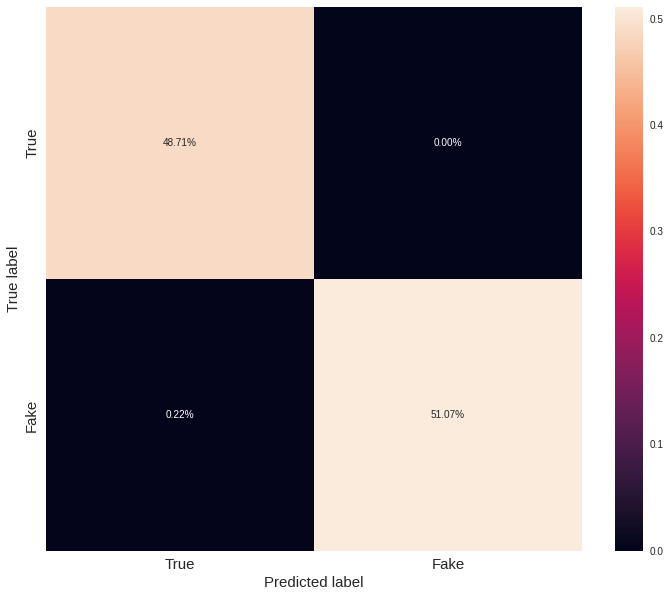

In [ ]:
# Ploting the Support Vector Machine(SVM) confusion matrix using the seaborn library

graph = confusion_matrix(y_test, svm_tuning_prediction)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph / np.sum(graph),fmt='.2%', annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr1_tuning, tpr1_tuning, thresh1_tuning = roc_curve(y_test, svm_tuning_prediction)

# auc scores
auc_score1_tuning = roc_auc_score(y_test, svm_tuning_prediction)
auc_score1_tuning = '{0:.3g}'.format(auc_score1_tuning)

print("The AUC score for Support Vector Machine model after tuning is: ", auc_score1_tuning)

The AUC score for Support Vector Machine model after tuning is:  0.998


### Tuning Logistic Regression Classifier

In [ ]:
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]}

lr_tuning = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           cv = 5, refit = True, scoring = 'accuracy', n_jobs = 4)

#Fitting training set to the model
lr_tuning.fit(xv_train,y_train)

#Predicting the test set results based on the model
tuning_lr_y_pred = lr_tuning.predict(xv_test)

In [ ]:
# print best parameter after tuning
print(lr_tuning.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(lr_tuning.best_estimator_)

print('Best C:', lr_tuning.best_estimator_.get_params()['C'])

{'C': 100, 'solver': 'liblinear'}
LogisticRegression(C=100, solver='liblinear')
Best C: 100


In [ ]:
# Calculate the accuracy score of this model
lr_tuning_accuracy_score = accuracy_score(y_test,tuning_lr_y_pred)
print('Accuracy of Logistic Regression Classifier model after tuning parameters is ', lr_tuning_accuracy_score)

# Calculate the Precision score of Logistic Regression model
lr_tuning_precision_score = precision_score(y_test,tuning_lr_y_pred, average='macro')
print('\nPrecision of Logistic Regression model is ', lr_tuning_precision_score)

# Calculate the Recall score of Logistic Regression model
lr_tuning_recall_score = recall_score(y_test,tuning_lr_y_pred, average='macro')
print('\nRecall of Logistic Regression model is ', lr_tuning_recall_score)

# Calculate the F1 score of Logistic Regression model
lr_tuning_f1_score = f1_score(y_test,tuning_lr_y_pred, average='macro')
print('\nF1 score of Logistic Regression model is ', lr_tuning_f1_score)

# Logistic Regression Classifier - Classification Report
print("\nLogistic Regression Classifier after tuning parameters - Classification Report\n")
print(classification_report(y_test,tuning_lr_y_pred, target_names = ['True','Fake']))

Accuracy of Logistic Regression Classifier model after tuning parameters is  0.9977827050997783

Precision of Logistic Regression model is  0.9977341389728096

Recall of Logistic Regression model is  0.9978386167146974

F1 score of Logistic Regression model is  0.9977814641025151

Logistic Regression Classifier after tuning parameters - Classification Report

              precision    recall  f1-score   support

        True       1.00      1.00      1.00       659
        Fake       1.00      1.00      1.00       694

    accuracy                           1.00      1353
   macro avg       1.00      1.00      1.00      1353
weighted avg       1.00      1.00      1.00      1353



Text(0.5, 69.0, 'Predicted label')

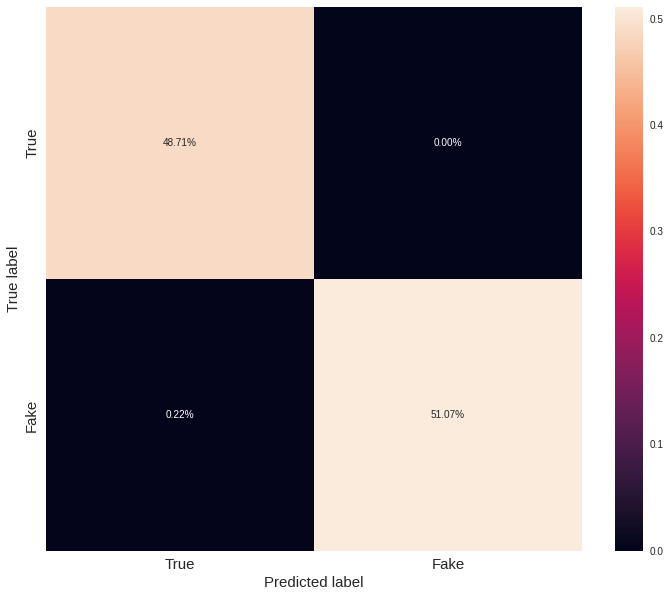

In [ ]:
# Ploting the confusion matrix using the seaborn library

graph = confusion_matrix(y_test, tuning_lr_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph/ np.sum(graph),fmt='.2%', annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr2_tuning, tpr2_tuning, thresh2_tuning = roc_curve(y_test, tuning_lr_y_pred)

# auc scores
auc_score2_tuning = roc_auc_score(y_test, tuning_lr_y_pred)
auc_score2_tuning = '{0:.3g}'.format(auc_score2_tuning)

print("The AUC score for Logistic Regression model after tuning is: ", auc_score2_tuning)

The AUC score for Logistic Regression model after tuning is:  0.998


### Tuning Naive Bayes Classifier Parameters

In [ ]:
# Tuning parameters
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

NB_tuning = GridSearchCV(estimator = GaussianNB(),param_grid = params_NB, cv = 5, refit = True, scoring = 'accuracy', n_jobs = 4)

#Fitting training set to the model
NB_tuning.fit(xv_train.toarray(),y_train)

#Predicting the test set results based on the model
tuning_nb_y_pred = NB_tuning.predict(xv_test.toarray())

In [ ]:
# print best parameter after tuning
print(NB_tuning.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(NB_tuning.best_estimator_)

{'var_smoothing': 8.111308307896872e-07}
GaussianNB(var_smoothing=8.111308307896872e-07)


In [ ]:
# Calculate the accuracy score of Gaussian Naive Bayes classifier
NB_tuning_accuracy_score = accuracy_score(y_test,tuning_nb_y_pred)
print('Accuracy of Naive Bayes model after tuning parameters is ', NB_tuning_accuracy_score)

# Calculate the Precision score of Gaussian Naive Bayes classifier
NB_tuning_precision_score = precision_score(y_test,tuning_nb_y_pred, average='macro')
print('\nPrecision of Gaussian Naive Bayes model after tuning parameters is ', NB_tuning_precision_score)

# Calculate the Recall score of Gaussian Naive Bayes classifier
NB_tuning_recall_score = recall_score(y_test,tuning_nb_y_pred, average='macro')
print('\nRecall of Gaussian Naive Bayes model after tuning parameters is ', NB_tuning_recall_score)

# Calculate the F1 score of Gaussian Naive Bayes classifier
NB_tuning_f1_score = f1_score(y_test,tuning_nb_y_pred, average='macro')
print('\nF1 score of Gaussian Naive Bayes model after tuning parameters is ', NB_tuning_f1_score)

# Gaussian Naive Bayes Classifier - Classification Report
print("\nGaussian Naive Bayes after tuning parameters - Classification Report\n")
print(classification_report(y_test,tuning_nb_y_pred, target_names = ['True','Fake']))

Accuracy of Naive Bayes model after tuning parameters is  0.9896526237989652

Precision of Gaussian Naive Bayes model after tuning parameters is  0.9898610946998043

Recall of Gaussian Naive Bayes model after tuning parameters is  0.989492637959007

F1 score of Gaussian Naive Bayes model after tuning parameters is  0.9896421619020539

Gaussian Naive Bayes after tuning parameters - Classification Report

              precision    recall  f1-score   support

        True       1.00      0.98      0.99       659
        Fake       0.98      1.00      0.99       694

    accuracy                           0.99      1353
   macro avg       0.99      0.99      0.99      1353
weighted avg       0.99      0.99      0.99      1353



Text(0.5, 69.0, 'Predicted label')

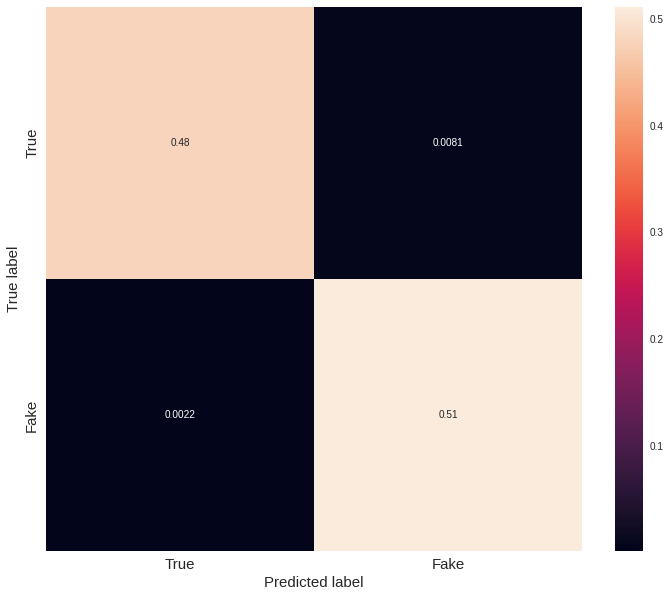

In [ ]:
# Ploting the confusion matrix using the seaborn library

graph = confusion_matrix(y_test, tuning_nb_y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph / np.sum(graph), annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for models
fpr3_tuning, tpr3_tuning, thresh3_tuning = roc_curve(y_test, tuning_nb_y_pred)

# auc scores
auc_score3_tuning = roc_auc_score(y_test, tuning_nb_y_pred)
auc_score3_tuning = '{0:.3g}'.format(auc_score3_tuning)

print("The AUC score for Gaussian Naive Bayes model after tuning is: ", auc_score3_tuning)

The AUC score for Gaussian Naive Bayes model after tuning is:  0.989


### Results for experiment 4

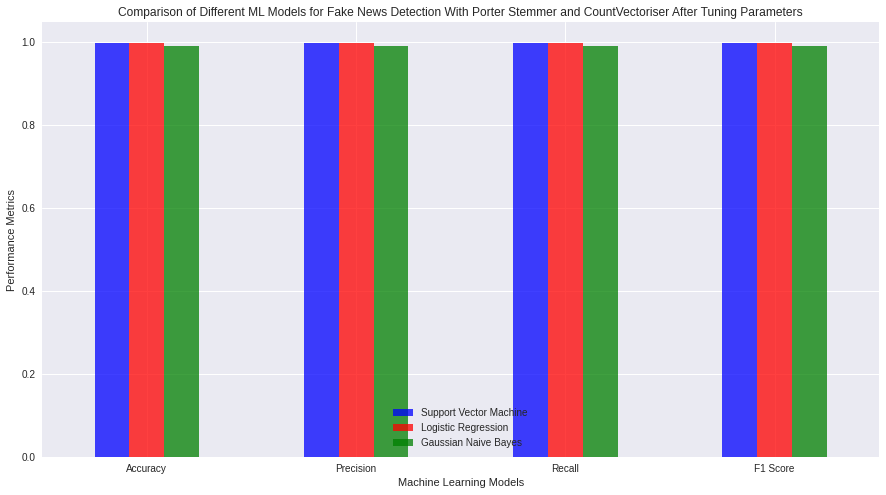

In [ ]:
plotdata_tuning = pd.DataFrame({
    "Support Vector Machine":[svm_tuning_accuracy_score,svm_tuning_precision_score,svm_tuning_recall_score,svm_tuning_f1_score],

    "Logistic Regression":[lr_tuning_accuracy_score,lr_tuning_precision_score,lr_tuning_recall_score,lr_tuning_f1_score],

    "Gaussian Naive Bayes":[NB_tuning_accuracy_score,NB_tuning_precision_score,NB_tuning_recall_score,NB_tuning_f1_score]},

    index=["Accuracy", "Precision", "Recall", "F1 Score"])

plotdata_tuning.plot(kind="bar",figsize=(15, 8),alpha=0.75, rot=0, color=['blue', 'red', 'green'])

plt.title("Comparison of Different ML Models for Fake News Detection With Porter Stemmer and CountVectoriser After Tuning Parameters")

plt.xlabel("Machine Learning Models")

plt.ylabel("Performance Metrics")

plt.savefig('Comparison',dpi=300)

In [ ]:
display(plotdata_tuning)

,Support Vector Machine,Logistic Regression,Gaussian Naive Bayes
Accuracy,0.997783,0.997783,0.989653
Precision,0.997734,0.997734,0.989861
Recall,0.997839,0.997839,0.989493
F1 Score,0.997781,0.997781,0.989642


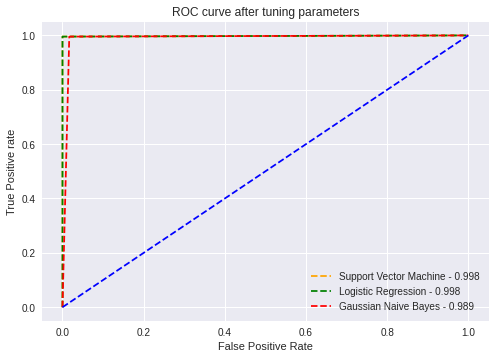

In [ ]:
plt.style.use('seaborn')

label1 = 'Support Vector Machine - ' + auc_score1_tuning
label2 = 'Logistic Regression - ' + auc_score2_tuning
label3 = 'Gaussian Naive Bayes - ' + auc_score3_tuning

# plot roc curves
plt.plot(fpr1_tuning, tpr1_tuning, linestyle='--',color='orange', label=label1)
plt.plot(fpr2_tuning, tpr2_tuning, linestyle='--',color='green', label=label2)
plt.plot(fpr3_tuning, tpr3_tuning, linestyle='--',color='red', label=label3)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve after tuning parameters')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_tuning',dpi=300)
plt.show();

## LSTM and Word2Vec experiment 5

In [ ]:
# y is the class label
y = lstm_df["class"].values

# X is the news articles
X = []

# Converting training data into the format that is acceptable by gensim

# We use the tokenisation function provided by NLTK library
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

for paragraph in lstm_df["text"].values:
    # Create a temp list to store the sentence
    tmp = []

    # Using the sentence tokenizer
    sentences = nltk.sent_tokenize(paragraph)
    
    # Get every sentence in the corpus to process the text
    for sent in sentences:
      
      # Lowercase the sentence
      sent = sent.lower()

      # Tokenise the sentence into each individual word
      tokens = tokenizer.tokenize(sent)

      # Remove stop words
      filtered_words = [w.strip() for w in tokens if w not in stopwords.words('english') and len(w) > 1]
      tmp.extend(filtered_words)
    X.append(tmp)

In [ ]:
# Dimensionality of the feature vectors
size_embedding = 200 

# Maximum distance between the current and predicted word within a sentence
windows = 2 

# We do not want our model to learn word that only apprear this amount of time
min_count = 1 

# Build our w2v model 
w2v_model = gensim.models.Word2Vec(sentences = X, size = size_embedding, window = windows, min_count = min_count)

In [ ]:
# Vovabulary size
len(w2v_model.wv.vocab)

122369

In [ ]:
# Tokenize the test and change them into lowercase
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# texts_to_sequence() takes a list of sentences and converts them into a sequence of numbers.
X = tokenizer.texts_to_sequences(X)

word_index = tokenizer.word_index
print('Save of vocabulary: ', len(word_index))

Save of vocabulary:  122369


In [ ]:
# Set the max len of all news to 700
maxlen = 700 

# Making all news of size maxlen defined above
# pad_sequences is used to ensure that all sequences in a list have the same length.
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
# Function to create weight matrix from word2vec gensim model
def get_matrix_weight(model, vocab):
  
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1

    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, size_embedding))

    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
# We need to obtain embedding vectors from word2vec
embedding_vectors = get_matrix_weight(w2v_model, word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
# Create LSTM model
def set_model(embedding_vectors):
    model = Sequential()
    model.add(Embedding(embedding_vectors.shape[0], 
                        output_dim=embedding_vectors.shape[1],
                        weights=[embedding_vectors], 
                        input_length=maxlen, 
                        trainable=False))
    model.add(LSTM(units=32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Get the summary of LSTM model
model = set_model(embedding_vectors = embedding_vectors)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 200)          24474000  
                                                                 
 lstm (LSTM)                 (None, 32)                29824     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 24,503,857
Trainable params: 29,857
Non-trainable params: 24,474,000
_________________________________________________________________


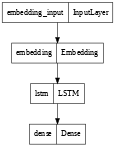

In [ ]:
keras.utils.plot_model(model, dpi=90)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size = 32, verbose = 1)

Epoch 1/10
752/752 [==============================] - 26s 25ms/step - loss: 0.1314 - accuracy: 0.9536 - val_loss: 0.0781 - val_accuracy: 0.9742
Epoch 2/10
752/752 [==============================] - 18s 24ms/step - loss: 0.0528 - accuracy: 0.9830 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 3/10
752/752 [==============================] - 18s 24ms/step - loss: 0.0357 - accuracy: 0.9871 - val_loss: 0.0294 - val_accuracy: 0.9904
Epoch 4/10
752/752 [==============================] - 18s 24ms/step - loss: 0.0454 - accuracy: 0.9835 - val_loss: 0.0282 - val_accuracy: 0.9910
Epoch 5/10
752/752 [==============================] - 19s 25ms/step - loss: 0.0300 - accuracy: 0.9893 - val_loss: 0.0256 - val_accuracy: 0.9909
Epoch 6/10
752/752 [==============================] - 19s 25ms/step - loss: 0.0247 - accuracy: 0.9930 - val_loss: 0.0209 - val_accuracy: 0.9950
Epoch 7/10
752/752 [==============================] - 18s 24ms/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.0230 - val_accuracy:

### Results

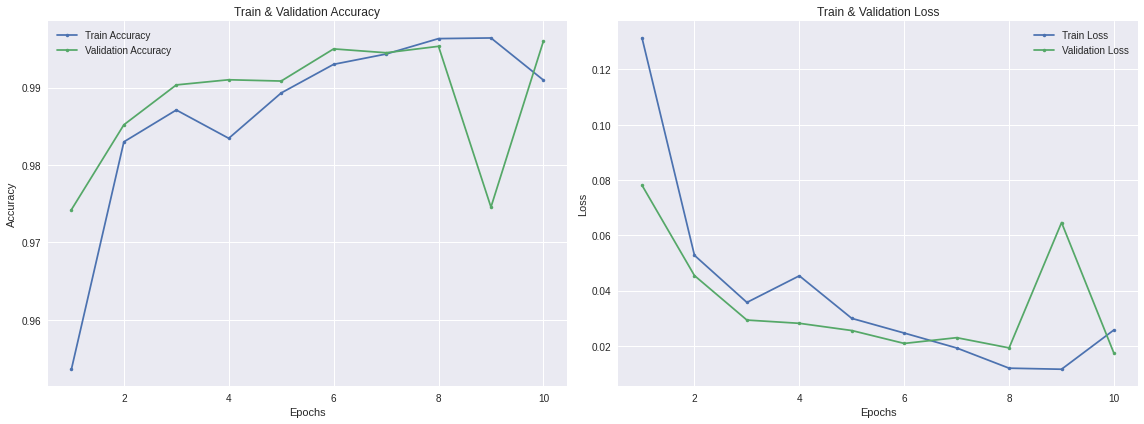

In [ ]:
# accuracy higher than val_accuracy indicate overfitting
# Plots how well the model did at each epoch for training and validation data.

def plot_loss_epochs(history):
    epochs = np.arange(1,len(history.history['accuracy']) + 1,1)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    fig , ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].plot(epochs , train_acc , '.-' , label = 'Train Accuracy')
    ax[0].plot(epochs , val_acc , '.-' , label = 'Validation Accuracy')
    ax[0].set_title('Train & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , '.-' , label = 'Train Loss')
    ax[1].plot(epochs , val_loss , '.-' , label = 'Validation Loss')
    ax[1].set_title('Train & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    fig.tight_layout()
    fig.show()
    
plot_loss_epochs(history)

In [ ]:
# Model evaluation to get the accuracy of the model
model.evaluate(X_test, y_test)

464/464 [==============================] - 6s 12ms/step - loss: 0.0178 - accuracy: 0.9953


[0.017776163294911385, 0.9952756762504578]

In [ ]:
# Since fake news detection is a binary classification problem
# We use this function to obtain whether it is fake news (1) or true news (0)
y_pred = (model.predict(X_test) >= 0.5).astype("int")

In [ ]:
# Classification report of LSTM model
print(classification_report(y_test, y_pred , target_names = ['True','Fake']))

              precision    recall  f1-score   support

        True       0.99      1.00      1.00      7067
        Fake       1.00      0.99      1.00      7750

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817



In [ ]:
# Print the result of LSTM model
lstm_accuracy = accuracy_score(y_pred, y_test)
lstm_precision = precision_score(y_pred, y_test)
lstm_recall = recall_score(y_pred, y_test)
lstm_f1 = f1_score(y_pred, y_test)

print('Accuracy of LSTM model is:', lstm_accuracy)
print('\nPrecision of LSTM model is:', lstm_precision)
print('\nRecall of LSTM model is:', lstm_recall)
print('\nF1 Score of LSTM model is:', lstm_f1)

Accuracy of LSTM model is: 0.9952756968347168

Precision of LSTM model is: 0.9944516129032258

Recall of LSTM model is: 0.9965089216446859

F1 Score of LSTM model is: 0.995479204339964


In [ ]:
# Create a dataframe for LSTM results
lstm_result = pd.DataFrame({
    
    "Model":['Long Short Term Memory'],

    "Accuracy":[lstm_accuracy],

    "Precision":[lstm_precision],

    "Recall":[lstm_recall],

    "F1 Score":[lstm_f1]},

    columns=["Model","Accuracy", "Precision", "Recall", "F1 Score"])

In [ ]:
# Display the results
display(lstm_result)

,Model,Accuracy,Precision,Recall,F1 Score
0,Long Short Term Memory,0.995276,0.994452,0.996509,0.995479


Text(0.5, 69.0, 'Predicted label')

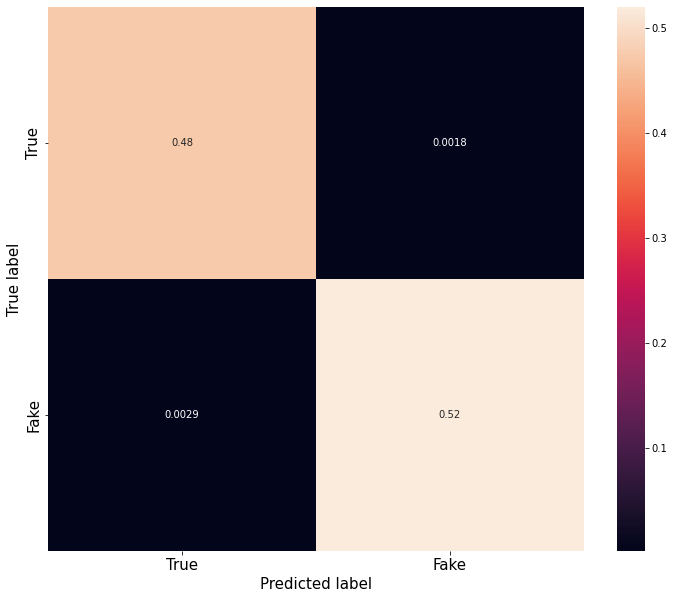

In [ ]:
# Ploting the confusion matrix using the seaborn library

graph = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph / np.sum(graph), annot=True, ax = ax)
ax.xaxis.set_ticklabels(['True','Fake'], size=15)
ax.yaxis.set_ticklabels(['True','Fake'], size=15)
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

In [ ]:
# roc curve for LSTM model
fpr_lstm, tpr_lstm, thresh_lstm = roc_curve(y_test, y_pred)

# auc scores
auc_score_lstm = roc_auc_score(y_test, y_pred)
auc_score_lstm = '{0:.3g}'.format(auc_score_lstm)

print("The AUC score for LSTM model is: ", auc_score_lstm)

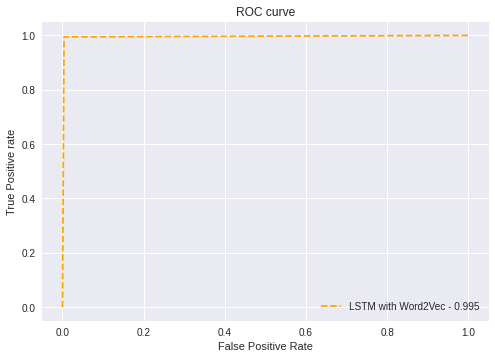

In [ ]:
label = 'LSTM with Word2Vec - ' + auc_score_lstm

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_lstm, tpr_lstm, linestyle='--',color='orange', label=label)
# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Fake News Dectation And Perform Text Summarisation

In [ ]:
ps = PorterStemmer()
def stemming(content):
    # All the sequences except english characters are removed from the string
    review = re.sub('[^a-zA-Z]',' ',content)
    # Remove html tags and punctuation
    review = re.sub('<[^>]*>', '', content)
    review = re.sub(r'[^\w\s]','', content)
    # All the strings are converted to lower case
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [ ]:
# As SVM and Logistic Regression are able to provide best results - either will be used to check the news liability

def fake_news_detection(news):
    # Give a text row for the news article
    input_data = {"text":[news]}
    
    # Turn the news into dataframe
    news_data = pd.DataFrame(input_data)
    
    # Applying text pre-processing for the news article
    news_data["text"] = news_data["text"].apply(stemming) 

    # Text vectorisation for the input news
    vectorized_input_data = CV_vectorization.transform(news_data)

    # We use logistic regression model from experiment 4 to predict the news article   
    prediction = lr_tuning.predict(vectorized_input_data)
    
    if prediction == 0:
        print("This is a true news article.\n\n")
    else:
        print("This is a fake news article, no text summarisation needed!!")
      
    return prediction

In [ ]:
from heapq import nlargest
import spacy
from string import punctuation

def text_summarisation(news):
  
  # Create a dictionary for bag of words 
  bow = {}

  # Performing text processing
  for word in news:
    if word.text.lower() not in stopwords.words('english'):
      if word.text.lower() not in punctuation:
        # Check if word exists in the dictionary
        if word.text not in bow.keys():
          bow[word.text] = 1
        else:
          bow[word.text] += 1

  # Find thr word with the highest frequency in the document
  max_frequency = max(bow.values())
  
  # We need to calculate each word's frequenct that appears in the document by the word with the highest frequency
  for word in bow.keys():
    bow[word] = bow[word]/max_frequency

  # Tokenise the document into each individual sentences
  sentence_tokens = [sent for sent in news.sents]

  # Create a dictionary for each sentence's score
  sentence_score = {}

  # We need to add those frequency count in these sentences, to select the most import sentence
  for sent in sentence_tokens:
    for word in sent:
      if word.text.lower() in bow.keys():
        if sent not in sentence_score.keys():
          sentence_score[sent] = bow[word.text.lower()]
        else:
          sentence_score[sent] += bow[word.text.lower()]

  # The number of summaries we want to select, the higher the value, the more summary text there is.
  total_percentage = 0.4
  
  # We will choose the best sentences based on the percentage assigned above
  select_length = int(len(sentence_tokens)*total_percentage)
  
  # The nlargest() function is used to get the first n rows ordered by columns in descending order
  summary = nlargest(select_length, sentence_score, key = sentence_score.get)

  # Take each of the words from the summary to make them into a list
  final_summary = [word.text for word in summary]

  # Join all the sentences into one paragraph 
  summary = ' '. join(final_summary)

  return summary


In [ ]:
# Example of true news article
true_news_example = """The Reserve Bank of India (RBI) Governor Urjit Patel attends a news conference after the bi-monthly monetary policy review in Mumbai, India, October 4, 2017. REUTERS/Shailesh Andrade
MUMBAI (Reuters) - Fostering monetary conditions conducive to economic growth were a constant consideration for Indian policymakers, but would not take priority over achieving the central bank’s inflation target, Governor Urjit Patel told a newspaper on Monday.
Patel told the Mint newspaper that the economy was recovering, after growth slowed to a three-year low of 5.7 percent in the April-June quarter.
The slowdown had sparked some calls for lower interest rates, but with inflation rising the RBI left rates unchanged at a review by the monetary policy committee (MPC) last week.
“Growth is always there in the MPC’s scheme of things; we don’t lose sight of that, but not at the cost of inflation,” Patel was quoted as saying in the interview.
“However, we have to be careful — we should aim at achieving the inflation target without losing sight of supporting economic growth.”
Consumer inflation accelerated to 3.36 percent in August. India’s central bank has a medium-term target for annual inflation of 4 percent with the flexibility of plus/minus 2 percent on either side to make room for food price volatility.
The (MPC) will strive to achieve its 4 percent inflation target on a “durable basis”, Patel said.
Last week, the RBI kept its repo rate unchanged at 6.00 percent as expected last week, and raised inflation projections, cooling hopes for future rate cuts.
However, Patel said growth was already starting to recover. The RBI last week cut its projection for gross value added - an indicator of growth it prefers to 6.7 percent from 7.3 percent for the year ending in March - higher than some analyst forecasts.
“Our projections based on high frequency real economy indicators suggest that growth will pick up in the third and fourth quarters (of the current fiscal year) to above 7 percent,” he told Mint.
“We have started seeing the upturn.”
Patel has given only a handful of interviews since taking over as RBI Governor late last year.
For the full Mint interview, see: (bit.ly/2yytqPn)
Reporting by Suvashree Dey Choudhury"""

# Predict the news authenticity 
prediction = fake_news_detection(true_news_example)

# We only perform text summarisation when the news is true
if prediction == 0:

  # Transforming the text into spacy format
  # English pipeline optimized for CPU
  nlp = spacy.load("en_core_web_sm")
  document = nlp(true_news_example)

  # Perform text summarisation
  summary = text_summarisation(document)

  print("Summarised News Article")
  print(summary)

  ROUGE = Rouge()

  print("\n\nOriginal number of text is ", len(true_news_example))
  print("Summary article number of text is ", len(summary))

This is a true news article.


Summarised News Article
India’s central bank has a medium-term target for annual inflation of 4 percent with the flexibility of plus/minus 2 percent on either side to make room for food price volatility.
 Last week, the RBI kept its repo rate unchanged at 6.00 percent as expected last week, and raised inflation projections, cooling hopes for future rate cuts.
 The RBI last week cut its projection for gross value added - an indicator of growth it prefers to 6.7 percent from 7.3 percent for the year ending in March - higher than some analyst forecasts.
 “Our projections based on high frequency real economy indicators suggest that growth will pick up in the third and fourth quarters (of the current fiscal year) to above 7 percent,” he told Mint.
 Fostering monetary conditions conducive to economic growth were a constant consideration for Indian policymakers, but would not take priority over achieving the central bank’s inflation target, Governor Urjit Patel 

In [ ]:
# Text Summarisation Performance Evaluation

reference_summary = """The Reserve Bank of India (RBI) Governor Urjit Patel attends a news conference after the bi-monthly monetary policy review in Mumbai, India, October 4, 2017.

“We have started seeing the upturn.” Patel has given only a handful of interviews since taking over as RBI Governor late last year.

REUTERS/Shailesh Andrade MUMBAI (Reuters) - Fostering monetary conditions conducive to economic growth were a constant consideration for Indian policymakers, but would not take priority over achieving the central bank’s inflation target, Governor Urjit Patel told a newspaper on Monday.

Patel told the Mint newspaper that the economy was recovering, after growth slowed to a three-year low of 5.7 percent in the April-June quarter."""

ROUGE.get_scores(true_news_example, reference_summary)

[{'rouge-1': {'r': 1.0, 'p': 0.39111111111111113, 'f': 0.562300315446723},
  'rouge-2': {'r': 0.981651376146789,
   'p': 0.3022598870056497,
   'f': 0.4622030201581386},
  'rouge-l': {'r': 1.0, 'p': 0.39111111111111113, 'f': 0.562300315446723}}]

In [ ]:
# Example of true news article
true_news_example2 = """Former President Barack Obama and his wife, Michelle, also released a statement about Mr. Weinstein, saying that “any man who demeans and degrades women in such fashion needs to be condemned and held accountable, regardless of wealth or status.” The Obamas’ older daughter, Malia, was an intern at the Weinstein Company this year.
Advertisement Continue reading the main story
The Weinstein Company’s board said in a statement on Tuesday that it was “shocked and dismayed” by the allegations. “These alleged actions are antithetical to human decency,” the board said. One-third of the company’s all-male board had resigned on Friday.
Also on Tuesday, Georgina Chapman, Mr. Weinstein’s wife, told People magazine that she was leaving him. And the University of Southern California’s School of Cinematic Arts said it had decided to reject his earlier pledge to fund a $5 million endowment for female filmmakers.
Mr. Eisner and Jeffrey Katzenberg, who was then in charge of Disney’s movie divisions, bought Miramax in 1993 for $80 million. At the time, Miramax was becoming a superpower in the art film business by turning offbeat, inexpensive movies into mainstream hits. It was in 1992, for instance, that Miramax released the micro-budgeted thriller “The Crying Game,” which collected $62 million at the box office, or $110 million in today’s dollars.
On Tuesday, Mr. Katzenberg released an email that he sent to Mr. Weinstein on Sunday and that said he was “sickened” by the allegations. “There appear to be two Harvey Weinsteins … one that I have known well, appreciated and admired and another that I have not known at all,” Mr. Katzenberg’s email said.
Newsletter Sign Up Continue reading the main story Please verify you're not a robot by clicking the box. Invalid email address. Please re-enter. You must select a newsletter to subscribe to. Sign Up You agree to receive occasional updates and special offers for The New York Times's products and services. Thank you for subscribing. An error has occurred. Please try again later. View all New York Times newsletters.
Robert A. Iger, Disney’s current chief executive, said in a separate statement, “Harvey Weinstein’s reported behavior is abhorrent and unacceptable, and it has no place in our society.” Disney sold Miramax in 2010 for $660 million.
The flurry of comments came five days after a New York Times investigation chronicled a hidden history of sexual harassment allegations against Mr. Weinstein, including settlements paid, often involving former employees, over three decades. On Sunday, the Weinstein Company fired him, citing “new information about misconduct by Harvey Weinstein.”
In response to the allegations, Mr. Weinstein has acknowledged that his behavior “caused a lot of pain.” But a spokeswoman, Sallie Hofmeister, also said he “unequivocally denied” any allegations of nonconsensual sex.
Disney’s purchase of Miramax included provisions that shielded Miramax from corporate interference. The Weinsteins were given the ability to “greenlight” films with budgets of tens of millions of dollars without approval from Disney. Miramax also got to retain its own chief financial officer, head of human relations and general counsel.
According to reports at the time, the brothers demanded the autonomy, arguing that their films — which would include rough-and-rowdy titles like “Pulp Fiction,” released in 1994 — could not be incubated inside a corporate environment.
While with Disney, Miramax released more than 300 movies, which generated $5 billion in North American ticket sales and tallied at least 220 Academy Award nominations and 53 wins, including best picture Oscars for “Shakespeare in Love,” “The English Patient” and “Chicago.”
Advertisement Continue reading the main story
But Disney also clashed bitterly with the Weinsteins, who took advantage of their autonomy to start an expensive magazine, Talk, without approval and to move forward with the political documentary “Fahrenheit 9/11” despite being told that Disney would not distribute it. At the time, executives at Disney said Miramax had hidden its financing of that film by not including it on monthly reports about films in development; Miramax officials countered that they were aboveboard."""

# Predict the news authenticity 
prediction = fake_news_detection(true_news_example2)

# We only perform text summarisation when the news is true
if prediction == 0:

  # Transforming the text into spacy format
  # English pipeline optimized for CPU
  nlp = spacy.load("en_core_web_sm")
  document = nlp(true_news_example2)

  # Perform text summarisation
  summary = text_summarisation(document)

  print("Summarised News Article")
  print(summary)

  ROUGE = Rouge()

  print("\n\nOriginal number of text is ", len(true_news_example2))
  print("Summary article number of text is ", len(summary))


This is a true news article.


Summarised News Article
While with Disney, Miramax released more than 300 movies, which generated $5 billion in North American ticket sales and tallied at least 220 Academy Award nominations and 53 wins, including best picture Oscars for “Shakespeare in Love,” “The English Patient” and “Chicago.”
 Advertisement Continue reading the main story
The Weinstein Company’s board said in a statement on Tuesday that it was “shocked and dismayed” by the allegations. It was in 1992, for instance, that Miramax released the micro-budgeted thriller “The Crying Game,” which collected $62 million at the box office, or $110 million in today’s dollars.
 Advertisement Continue reading the main story
But Disney also clashed bitterly with the Weinsteins, who took advantage of their autonomy to start an expensive magazine, Talk, without approval and to move forward with the political documentary “Fahrenheit 9/11” despite being told that Disney would not distribute it. Accordin

In [ ]:
# Text Summarisation Performance Evaluation

reference_summary2 = """While with Disney, Miramax released more than 300 movies, which generated $5 billion in North American ticket sales and tallied at least 220 Academy Award nominations and 53 wins, including best picture Oscars for “Shakespeare in Love,” “The English Patient” and “Chicago.” 
Advertisement Continue reading the main story
The Weinstein Company’s board said in a statement on Tuesday that it was “shocked and dismayed” by the allegations. 
Advertisement Continue reading the main story
But Disney also clashed bitterly with the Weinsteins, who took advantage of their autonomy to start an expensive magazine, Talk, without approval and to move forward with the political documentary “Fahrenheit 9/11” despite being told that Disney would not distribute it. 
According to reports at the time, the brothers demanded the autonomy, arguing that their films — which would include rough-and-rowdy titles like “Pulp Fiction,” released in 1994 — could not be incubated inside a corporate environment. 
On Tuesday, Mr. Katzenberg released an email that he sent to Mr. Weinstein on Sunday and that said he was “sickened” by the allegations. 
Robert A. Iger, Disney’s current chief executive, said in a separate statement, “Harvey Weinstein’s reported behavior is abhorrent and unacceptable, and it has no place in our society.” It was in 1992, for instance, that Miramax released the micro-budgeted thriller “The Crying Game,” which collected $62 million at the box office, or $110 million in today’s dollars. 
In response to the allegations, Mr. Weinstein has acknowledged that his behavior “caused a lot of pain.” 
    Former President Barack Obama and his wife, Michelle, also released a statement about Mr. Weinstein, saying that “any man who demeans and degrades women in such fashion needs to be condemned and held accountable, regardless of wealth or status.” “There appear to be two Harvey Weinsteins … one that I have known well, appreciated and admired and another that I have not known at all,” Mr. Katzenberg’s email said. But a spokeswoman, Sallie Hofmeister, also said he “unequivocally denied” any allegations of nonconsensual sex. “These alleged actions are antithetical to human decency,” the board said. The Weinsteins were given the ability to “greenlight” films with budgets of tens of millions of dollars without approval from Disney. 
The flurry of comments came five days after a New York Times investigation chronicled a hidden history of sexual harassment allegations against Mr. Weinstein, including settlements paid, often involving former employees, over three decades."""

ROUGE.get_scores(true_news_example2, reference_summary2)

[{'rouge-1': {'r': 1.0, 'p': 0.6640826873385013, 'f': 0.7981366411664771},
  'rouge-2': {'r': 0.968421052631579,
   'p': 0.5859872611464968,
   'f': 0.7301587254613884},
  'rouge-l': {'r': 1.0, 'p': 0.6640826873385013, 'f': 0.7981366411664771}}]

In [ ]:
# Example of fake news article
fake_news_example = """Why the Truth Might Get You Fired October 29, 2016 
The tension between intelligence analysts and political policymakers has always been between honest assessments and desired results, with the latter often overwhelming the former, as in the Iraq War, writes Lawrence Davidson. 
By Lawrence Davidson 
For those who might wonder why foreign policy makers repeatedly make bad choices, some insight might be drawn from the following analysis. The action here plays out in the United States, but the lessons are probably universal. 
Back in the early spring of 2003, George W. Bush initiated the invasion of Iraq. One of his key public reasons for doing so was the claim that the country‚Äôs dictator, Saddam Hussein, was on the verge of developing nuclear weapons and was hiding other weapons of mass destruction. The real reason went beyond that charge and included a long-range plan for ‚Äúregime change‚Äù in the Middle East. President George W. Bush and Vice President Dick Cheney receive an Oval Office briefing from CIA Director George Tenet. Also present is Chief of Staff Andy Card (on right). (White House photo) 
For our purposes, we will concentrate on the belief that Iraq was about to become a hostile nuclear power. Why did President Bush and his close associates accept this scenario so readily? 
The short answer is Bush wanted, indeed needed, to believe it as a rationale for invading Iraq. At first he had tried to connect Saddam Hussein to the 9/11 attacks on the U.S. Though he never gave up on that stratagem, the lack of evidence made it difficult to rally an American people, already fixated on Afghanistan, to support a war against Baghdad. 
But the nuclear weapons gambit proved more fruitful, not because there was any hard evidence for the charge, but because supposedly reliable witnesses, in the persons of exiled anti-Saddam Iraqis (many on the U.S. government‚Äôs payroll ), kept telling Bush and his advisers that the nuclear story was true. 
What we had was a U.S. leadership cadre whose worldview literally demanded a mortally dangerous Iraq, and informants who, in order to precipitate the overthrow of Saddam, were willing to tell the tale of pending atomic weapons. The strong desire to believe the tale of a nuclear Iraq lowered the threshold for proof . Likewise, the repeated assertions by assumed dependable Iraqi sources underpinned a nationwide U.S. campaign generating both fear and war fever. 
So the U.S. and its allies insisted that the United Nations send in weapons inspectors to scour Iraq for evidence of a nuclear weapons program (as well as chemical and biological weapons). That the inspectors could find no convincing evidence only frustrated the Bush administration and soon forced its hand. 
On March 19, 2003, Bush launched the invasion of Iraq with the expectation was that, once in occupation of the country, U.S. inspectors would surely find evidence of those nukes (or at least stockpiles of chemical and biological weapons). They did not. Their Iraqi informants had systematically lied to them. 
Social and Behavioral Sciences to the Rescue? 
The various U.S. intelligence agencies were thoroughly shaken by this affair, and today, 13 years later, their directors and managers are still trying to sort it out ‚Äì specifically, how to tell when they are getting ‚Äútrue‚Äù intelligence and when they are being lied to. Or, as one intelligence worker has put it, we need ‚Äú help to protect us against armies of snake oil salesmen. ‚Äù To that end the CIA et al. are in the market for academic assistance. Ahmed Chalabi, head of the Iraqi National Congress, a key supplier of Iraqi defectors with bogus stories of hidden WMD. 
A ‚Äúpartnership‚Äù is being forged between the Office of the Director of National Intelligence (ODNI), which serves as the coordinating center for the sixteen independent U.S. intelligence agencies, and the National Academies of Sciences, Engineering and Medicine . The result of this collaboration will be a ‚Äú permanent Intelligence Community Studies Board‚Äù to coordinate programs in ‚Äúsocial and behavioral science research [that] might strengthen national security .‚Äù 
Despite this effort, it is almost certain that the ‚Äúsocial and behavioral sciences‚Äù cannot give the spy agencies what they want ‚Äì a way of detecting lies that is better than their present standard procedures of polygraph tests and interrogations. But even if they could, it might well make no difference, because the real problem is not to be found with the liars. It is to be found with the believers. 
The Believers 
It is simply not true, as the ODNI leaders seem to assert, that U.S. intelligence agency personnel cannot tell, more often than not, that they are being lied to. This is the case because there are thousands of middle-echelon intelligence workers, desk officers, and specialists who know something closely approaching the truth ‚Äì that is, they know pretty well what is going on in places like Afghanistan, Iraq, Syria, Libya, Israel, Palestine and elsewhere. Director of National Intelligence James Clapper (right) talks with President Barack Obama in the Oval Office, with John Brennan and other national security aides present. (Photo credit: Office of Director of National Intelligence) 
Therefore, if someone feeds them ‚Äúsnake oil,‚Äù they usually know it. However, having an accurate grasp of things is often to no avail because their superiors ‚Äì those who got their appointments by accepting a pre-structured worldview ‚Äì have different criterion for what is ‚Äútrue‚Äù than do the analysts. 
Listen to Charles Gaukel, of the National Intelligence Council ‚Äì yet another organization that acts as a meeting ground for the 16 intelligence agencies. Referring to the search for a way to avoid getting taken in by lies, Gaukel has declared, ‚Äú We‚Äôre looking for truth. But we‚Äôre particularly looking for truth that works. ‚Äù Now what might that mean? 
I can certainly tell you what it means historically. It means that for the power brokers, ‚Äútruth‚Äù must match up, fit with, their worldview ‚Äì their political and ideological precepts. If it does not fit, it does not ‚Äúwork.‚Äù So the intelligence specialists who send their usually accurate assessments up the line to the policy makers often hit a roadblock caused by ‚Äúgroup think,‚Äù ideological blinkers, and a ‚Äúwe know better‚Äù attitude. 
On the other hand, as long as what you‚Äôre selling the leadership matches up with what they want to believe, you can peddle them anything: imaginary Iraqi nukes, Israel as a Western-style democracy, Saudi Arabia as an indispensable ally, Libya as a liberated country, Bashar al-Assad as the real roadblock to peace in Syria, the Strategic Defense Initiative (SDI) aka Star Wars, a world that is getting colder and not warmer, American exceptionalism in all its glory ‚Äì the list is almost endless. 
What does this sad tale tell us? If you want to spend millions of dollars on social and behavioral science research to improve the assessment and use of intelligence, forget about the liars. What you want to look for is an antidote to the narrow-mindedness of the believers ‚Äì the policymakers who seem not to be able to rise above the ideological presumptions of their class ‚Äì presumptions that underpin their self-confidence as they lead us all down slippery slopes. 
It has happened this way so often, and in so many places, that it is the source of Shakespeare‚Äôs determination that ‚Äúwhat is past, is prelude.‚Äù Our elites play out our destinies as if they have no free will ‚Äì no capacity to break with structured ways of seeing. Yet the middle-echelon specialists keep sending their relatively accurate assessments up the ladder of power. Hope springs eternal."""

# Predict the news authenticity 
prediction = fake_news_detection(fake_news_example)

# We only perform text summarisation when the news is true
if prediction == 0:

  # Transforming the text into spacy format
  # English pipeline optimized for CPU
  nlp = spacy.load("en_core_web_sm")
  document = nlp(fake_news_example)

  # Perform text summarisation
  summary = text_summarisation(document)

  ROUGE = Rouge()

  print("\n\nOriginal number of text is ", len(fake_news_example))
  print("Summary article number of text is ", len(summary))

  print("\n\nText Summarisation Performance Evaluation")
  print("------------------------------------------------")

  print(ROUGE.get_scores(fake_news_example, summary))

This is a fake news article, no text summarisation needed!!


In [ ]:
# Example of fake news article
fake_news_example2 = """Blackhawks Roster Breakdown: Goalies
(Before It's News)
With opening night less than a week away, the Blackhawks are down to some tough decisions with their roster. We talked at length about the options on Tuesday night’s Shoutcast, but there are some real questions. I’m going to break down some of the upcoming roster decisions or at least try to lay them out in a logical manor. This doesn’t mean Joel Quenneville decide to use the logical method. First, we look at my favorites, the goalies, which is the only position that is seemingly locked down.
Corey Crawford is the clear and unquestioned number one. He had has his injury bugs each year, but he is still a top 10 goalie in this league. We can all expect another injury at some point this year. It is inevitable. Crawford will continue his solid, unspectacular performance, and continue to be overlooked, as well as under rated. He won’t truly be appreciated until the Cup window is secured shut and this generation of players are retired. It is a shame that the guy gets so much angst from fans that don’t truly understand the intricacies of the position, but it is the nature of the sport and Chicago.
Sneaky offseason acquisition Anton Forsberg will back up Corey Crawford. Before camp began, I honestly thought that Jean-Francois Berube had a solid chance to challenge Forsberg for the backup job, but Berube had a pretty rusty performance against the Blue Jackets. This opened the door wide open for Forsberg. All he needs to do is be solid tonight in Detroit, and the race is officially over. Forsberg really impressed me in his opening game vs the Blue Jackets. He was big in net, quick in the crease, and composed. His reflexes are very good for a big guy. I am now aboard the Forsberg train. If he can keep this up, he’ll be a perfectly fine replacement for Scott Darling.
My dark horse this camp was Jean-Francois Berube, and he simply just didn’t deliver in his one opportunity. His first goal against was more the lack of support from his team, but he got a piece of the Ryan Murray shot. The last two goals against were pretty sloppy. There is no excuse to be giving up a goal off the end boards, from virtually behind the net, like he did to Lucas Sedlak. The third goal was a weak backhand less than a minute later by Oliver Bjorkstrand, that was actually defended alright by Brent Seabrook, which softly went 5-hole. He will be fine in Rockford, if he sneaks through waivers, and “should be” the number one guy there, but Jeff Glass is a former teammate of new coach Jeremy Colliton, so that could affect the game distribution. If Crawford or Forsberg get hurt, Berube is a fine option as well.
Jeff Glass is just a veteran depth guy that can be a leader in the locker room for the kids and provide some valuable consistent experience in the Icehogs backup role. If Glass ends up being counted on for more than a leadership role, then there are real problems.
First year pro (and Puckin Hostile favorite), Collin Delia doesn’t figure into the pro team’s plans this year, or even maybe next, but this will be an important season for him to earn a reputation and gather some crucial experience. Expect him to probably start the season in Indy, with the Fuel, and share time with Matt Tomkins. If Delia can have a solid season in Indy, we could see him get some time in Rockford as the season progresses. He has the potential and certainly has the talent. The fanboy in me wants to see Delia get some Rockford time and wow the pants off everyone, but the pragmatist in me says that isn’t realiztec to expect.
Matt Tomkins is signed to an AHL deal and will eventually end up in Indy with Delia. While I was certainly fine with Jake Hildebrand and Eric Levine in the ECHL last year, Delia and Tomkins are an upgrade to the depth of the organization. Hildebrand was just alright as the primary netminder in Indy, but was overmatched in the few times he actually saw the ice in Rockford. He today signed a tryout with the Tulsa Oilers of the ECHL. Levine was a temporary solution to the thin goaltending depth in the organization, as was Jeff Glass, and wasn’t even all that good in Indy.
Source: http://puckinhostile.blogspot.com/2017/09/blackhawks-roster-breakdown-goalies.html"""


# Predict the news authenticity 
prediction = fake_news_detection(fake_news_example2)

# We only perform text summarisation when the news is true
if prediction == 0:

  # Transforming the text into spacy format
  # English pipeline optimized for CPU
  nlp = spacy.load("en_core_web_sm")
  document = nlp(fake_news_example2)

  # Perform text summarisation
  summary = text_summarisation(document)

  ROUGE = Rouge()

  print("\n\nOriginal number of text is ", len(fake_news_example2))
  print("Summary article number of text is ", len(summary))

  print("\n\nText Summarisation Performance Evaluation")
  print("------------------------------------------------")

  print(ROUGE.get_scores(fake_news_example2, summary))

This is a fake news article, no text summarisation needed!!
